# Analysis: Visualizing Model Training <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports-&amp;-Config" data-toc-modified-id="Imports-&amp;-Config-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports &amp; Config</a></span></li></ul></li><li><span><a href="#Helpers" data-toc-modified-id="Helpers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Helpers</a></span></li><li><span><a href="#Branch-Prediction-Transfer" data-toc-modified-id="Branch-Prediction-Transfer-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Branch Prediction Transfer</a></span><ul class="toc-item"><li><span><a href="#Random-baseline-transfer-(lr=0.0)" data-toc-modified-id="Random-baseline-transfer-(lr=0.0)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Random baseline transfer (lr=0.0)</a></span></li><li><span><a href="#Random-baseline-transfer" data-toc-modified-id="Random-baseline-transfer-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random baseline transfer</a></span></li><li><span><a href="#Transfer" data-toc-modified-id="Transfer-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Transfer</a></span></li><li><span><a href="#Supervised-Baseline" data-toc-modified-id="Supervised-Baseline-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Supervised Baseline</a></span></li></ul></li><li><span><a href="#Threadcoarsening-Transfer" data-toc-modified-id="Threadcoarsening-Transfer-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Threadcoarsening Transfer</a></span><ul class="toc-item"><li><span><a href="#unified-2nd-run" data-toc-modified-id="unified-2nd-run-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>unified 2nd run</a></span></li><li><span><a href="#unified-first-run" data-toc-modified-id="unified-first-run-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>unified first run</a></span></li><li><span><a href="#Cypress-transfer-hypersearch" data-toc-modified-id="Cypress-transfer-hypersearch-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cypress transfer hypersearch</a></span></li><li><span><a href="#Kepler-Transfer-Hyper" data-toc-modified-id="Kepler-Transfer-Hyper-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Kepler Transfer Hyper</a></span></li><li><span><a href="#Fermi-Transfer-Hyper" data-toc-modified-id="Fermi-Transfer-Hyper-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Fermi Transfer Hyper</a></span></li><li><span><a href="#Tahiti-Transfer-Hyper" data-toc-modified-id="Tahiti-Transfer-Hyper-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Tahiti Transfer Hyper</a></span></li></ul></li><li><span><a href="#Devmap-Transfer" data-toc-modified-id="Devmap-Transfer-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Devmap Transfer</a></span><ul class="toc-item"><li><span><a href="#AMD-Supervised-Baseline-10x" data-toc-modified-id="AMD-Supervised-Baseline-10x-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>AMD Supervised Baseline 10x</a></span></li><li><span><a href="#NVIDIA-Supervised-Baseline-10x" data-toc-modified-id="NVIDIA-Supervised-Baseline-10x-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>NVIDIA Supervised Baseline 10x</a></span></li><li><span><a href="#NVIDIA-Transfer-10x" data-toc-modified-id="NVIDIA-Transfer-10x-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>NVIDIA Transfer 10x</a></span></li><li><span><a href="#AMD-Transfer-10x" data-toc-modified-id="AMD-Transfer-10x-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>AMD Transfer 10x</a></span></li><li><span><a href="#NVIDIA-Frozen-Transfer" data-toc-modified-id="NVIDIA-Frozen-Transfer-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>NVIDIA Frozen Transfer</a></span></li><li><span><a href="#AMD-Frozen-Transfer" data-toc-modified-id="AMD-Frozen-Transfer-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>AMD Frozen Transfer</a></span></li><li><span><a href="#NVIDIA-Supervised-Baseline" data-toc-modified-id="NVIDIA-Supervised-Baseline-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>NVIDIA Supervised Baseline</a></span></li><li><span><a href="#AMD-Supervised-Baseline" data-toc-modified-id="AMD-Supervised-Baseline-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>AMD Supervised Baseline</a></span></li></ul></li><li><span><a href="#Redo:-Transformer-Ablation" data-toc-modified-id="Redo:-Transformer-Ablation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Redo: Transformer Ablation</a></span></li><li><span><a href="#Redo-GGNN-(A)-Layer-Ablation" data-toc-modified-id="Redo-GGNN-(A)-Layer-Ablation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Redo GGNN (A) Layer Ablation</a></span></li><li><span><a href="#Transformer-Pretraining" data-toc-modified-id="Transformer-Pretraining-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Transformer Pretraining</a></span></li><li><span><a href="#GGNN-Pretraining" data-toc-modified-id="GGNN-Pretraining-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>GGNN Pretraining</a></span><ul class="toc-item"><li><span><a href="#GGNN-with-Pos" data-toc-modified-id="GGNN-with-Pos-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>GGNN with Pos</a></span></li></ul></li><li><span><a href="#GGNN-(A)---Layer-Ablation" data-toc-modified-id="GGNN-(A)---Layer-Ablation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>GGNN (A) - Layer Ablation</a></span></li><li><span><a href="#GGNN-(B)---run_over_binary_choices" data-toc-modified-id="GGNN-(B)---run_over_binary_choices-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>GGNN (B) - run_over_binary_choices</a></span></li><li><span><a href="#GGNN-(C)---run_with_node_types_and_structure_only" data-toc-modified-id="GGNN-(C)---run_with_node_types_and_structure_only-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>GGNN (C) - run_with_node_types_and_structure_only</a></span></li><li><span><a href="#Monitoring-Debug-Trash-Folder" data-toc-modified-id="Monitoring-Debug-Trash-Folder-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Monitoring Debug Trash Folder</a></span></li><li><span><a href="#Transformer-Hyperopt" data-toc-modified-id="Transformer-Hyperopt-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Transformer Hyperopt</a></span></li></ul></div>

## Imports \& Config

In [580]:
# Set editor width to something sane
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))


In [370]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib notebook

from pathlib import Path
import sys
# get root repository path
a = !pwd
repo_root = a[0].rsplit('ProGraML', maxsplit=1,)[0] + 'ProGraML'
print(repo_root)
#insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, repo_root)
repo_root = Path(repo_root)

import pandas as pd
from itertools import cycle

import pickle, json
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import torch
from torch_geometric.data import Data, DataLoader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/zacharias/ProGraML


In [371]:
pd.set_option('display.max_rows', 500)

In [372]:
from deeplearning.ml4pl.poj104.dataset import *


# Helpers

In [373]:
from deeplearning.ml4pl.poj104.analysis.analysis_helpers import annot_max, make_label, get_all_runs, plot_logs

In [569]:
def avg_over_kfold(logs, hyps, keys=['valid_acc'], display_list=None, gimme_all=False, mse=False):
    res = {}
    # fuse kfold results
    for name, log in logs.items():
        label = make_label(name, '', hyps, display_list).replace('\n', ' ').rsplit('_', maxsplit=1)[0]
        #_, run, split = name.rsplit('_', maxsplit=2)
        #_ , run, jobid ,split = name.rsplit('_', maxsplit=3)
        run, split = name.rsplit('_', maxsplit=1)
        val = logs[name][keys][-1:].values
        if not res.get(run):
            res[run] = (label, [])
        res[run][1].append(val)

    res_avg = {}
    res_all = {}
    for key, (label, l) in res.items():
        #assert len(l) == 10, len(l)
        if not len(l) == 10 and len(l) != 1:
            print(f"{key} has only {len(l)} guys!") 
        if not mse:
            res_avg[label] = np.mean(np.array(l), axis=0)
        else:
            raise
        res_all[label] = np.squeeze(np.array(l))
    if gimme_all:
        return res_avg, res_all
    return res_avg


In [375]:
def get_best_valid_acc(logs, name):
    return logs[name][logs[name]['valid_acc'].values.argmax():]

In [495]:
########### THREAD COARSENING !!! #########################
def threadcoarsening_avg_over_kfold(logs, hyps, keys=['valid_acc'], display_list=None, gimme_all=False):
    res = {}
    for name, log in logs.items():
        label = make_label(name, '', hyps, display_list).replace('\n', ' ').rsplit('_', maxsplit=1)[0]
        #_, run, split = name.rsplit('_', maxsplit=2)
        #_ , run, jobid ,split = name.rsplit('_', maxsplit=3)
        
        val = logs[name][keys][-1:].values
        if not res.get(run):
            res[run] = (label, [])
        res[run][1].append(val)

    res_avg = {}
    res_all = {}
    for key, (label, l) in res.items():
        #assert len(l) == 10, len(l)
        if not len(l) == 17:
            print(f"{key} has only {len(l)} guys!") 
        res_avg[label] = np.mean(np.array(l), axis=0)
        res_all[label] = np.squeeze(np.array(l))
    if gimme_all:
        return res_avg, res_all
    return res_avg


In [ ]:
bb

# Branch Prediction Transfer

In [633]:
display_list = ['output_dropout', 'batch_size']

In [634]:
sub = 'ault_logs_mirror/branch_prediction_logs/'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub
!ls {log_dir}

transformer_supervised	       transformer_transfer
transformer_supervised_random  transformer_transfer_random


## Random baseline transfer (lr=0.0)

In [635]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/branch_prediction_logs/transformer_transfer_random'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from transformer_transfer_random


In [636]:
avg, all_guys = avg_over_kfold(logs, hyps, keys=['valid_loss'], display_list=display_list, gimme_all=True)
avg

{'od0.0 bs  4 brt000': array([[0.2961963]])}

In [637]:
all_guys

{'od0.0 bs  4 brt000': array([0.26933863, 0.27638768, 0.34173457, 0.35038977, 0.2824135 ,
        0.28213788, 0.29330129, 0.25779164, 0.28976332, 0.31870469])}

In [638]:
logs.keys()

dict_keys(['brt000_0', 'brt000_1', 'brt000_2', 'brt000_3', 'brt000_4', 'brt000_5', 'brt000_6', 'brt000_7', 'brt000_8', 'brt000_9'])

## Random baseline transfer

In [639]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/branch_prediction_logs/transformer_supervised_random'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from transformer_supervised_random


In [640]:
avg, all_guys = avg_over_kfold(logs, hyps, keys=['valid_loss'], display_list=display_list, gimme_all=True)
avg

{'od0.0 bs  4 brs000': array([[0.18943106]])}

In [641]:
all_guys

{'od0.0 bs  4 brs000': array([0.22056265, 0.16483279, 0.22140907, 0.1996975 , 0.15670422,
        0.18165002, 0.17192953, 0.18284796, 0.17940317, 0.21527374])}

In [642]:
logs.keys()

dict_keys(['brs000_0', 'brs000_1', 'brs000_2', 'brs000_3', 'brs000_4', 'brs000_5', 'brs000_6', 'brs000_7', 'brs000_8', 'brs000_9'])

## Transfer

In [643]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/branch_prediction_logs/transformer_transfer'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from transformer_transfer


In [644]:
avg, all_guys = avg_over_kfold(logs, hyps, keys=['valid_loss'], display_list=display_list, gimme_all=True)
avg

{'od0.0 bs  4 btt000': array([[0.10574948]]),
 'od0.2 bs  4 btt001': array([[0.10881162]]),
 'od0.0 bs  8 btt002': array([[0.12577426]]),
 'od0.2 bs  8 btt003': array([[0.11837693]])}

In [645]:
all_guys

{'od0.0 bs  4 btt000': array([0.13697231, 0.10097968, 0.07686498, 0.06391057, 0.09665417,
        0.10376293, 0.09370524, 0.14042251, 0.09273378, 0.15148865]),
 'od0.2 bs  4 btt001': array([0.14650977, 0.10195424, 0.08089278, 0.06766205, 0.09880518,
        0.10570055, 0.09452849, 0.13701267, 0.09523271, 0.15981776]),
 'od0.0 bs  8 btt002': array([0.15337573, 0.13489492, 0.12025764, 0.11216982, 0.11507959,
        0.1123385 , 0.11321314, 0.14285716, 0.11007348, 0.14348261]),
 'od0.2 bs  8 btt003': array([0.16839077, 0.10966973, 0.1173166 , 0.07234599, 0.10903197,
        0.11048174, 0.10052119, 0.14838214, 0.10148264, 0.14614651])}

In [646]:
logs.keys()

dict_keys(['btt000_0', 'btt001_0', 'btt002_0', 'btt003_0', 'btt002_1', 'btt003_1', 'btt000_1', 'btt001_1', 'btt002_2', 'btt003_2', 'btt000_2', 'btt002_3', 'btt003_3', 'btt001_2', 'btt002_4', 'btt003_4', 'btt000_3', 'btt001_3', 'btt002_5', 'btt003_5', 'btt000_4', 'btt002_6', 'btt003_6', 'btt001_4', 'btt002_7', 'btt003_7', 'btt000_5', 'btt001_5', 'btt002_8', 'btt003_8', 'btt000_6', 'btt001_6', 'btt002_9', 'btt003_9', 'btt000_7', 'btt001_7', 'btt000_8', 'btt001_8', 'btt000_9', 'btt001_9'])

In [647]:
logs['btt000_0']

epoch         time  train_loss  train_acc  train_speed  train_ppl  \
0        2     2.949281    0.263847   0.107797    23.175094   1.301930   
1        3     5.294054    0.221869   0.128536    25.464889   1.248408   
2        4     7.973273    0.180269   0.125776    20.903293   1.197539   
3        5    10.582263    0.188040   0.129786    21.988537   1.206882   
4        6    13.157854    0.175917   0.133206    22.357500   1.192339   
5        7    15.753010    0.172031   0.123324    22.170742   1.187714   
6        8    18.409687    0.167947   0.117934    21.990122   1.182873   
7        9    20.909906    0.165997   0.124635    22.659724   1.180570   
8       10    23.474122    0.159181   0.129148    21.542036   1.172550   
9       11    25.993675    0.158843   0.114268    22.471660   1.172153   
10      12    28.715116    0.154575   0.122784    21.384434   1.167162   
11      13    31.343433    0.158404   0.134176    22.240793   1.171639   
12      14    33.922091    0.155762   0.115744    23.224484   1.168549   
13      15    36.463714    0.152177   0.124991    22.710821   1.164366   
14      16    39.224509    0.149402   0.115585    21.447766   1.161140   
15      17    41.973928    0.151341   0.116075    20.714861   1.163393   
16      18    44.726430    0.150064   0.122292    21.507859   1.161908   
17      19    47.145772    0.149330   0.115300    23.578847   1.161056   
18      20    49.790495    0.152969   0.137507    21.659549   1.165289   
19      21    52.322396    0.145020   0.110855    22.056902   1.156062   
20      22    54.912728    0.149479   0.126484    23.077226   1.161230   
21      23    57.566581    0.145098   0.128155    22.881210   1.156153   
22      24    60.155795    0.146946   0.129474    22.641207   1.158291   
23      25    62.775247    0.147586   0.122262    21.441788   1.159033   
24      26    65.463137    0.141064   0.105204    22.090339   1.151499   
25      27    68.043789    0.144532   0.121986    22.740812   1.155498   
26      28    70.747408    0.144829   0.118276    21.966869   1.155842   
27      29    73.431932    0.147035   0.137736    21.312721   1.158395   
28      30    75.875930    0.146270   0.124971    22.811580   1.157508   
29      31    78.218926    0.143497   0.127978    25.048571   1.154303   
30      32    80.654893    0.144216   0.111945    23.414109   1.155134   
31      33    83.221581    0.145950   0.131567    23.357352   1.157139   
32      34    85.935806    0.143026   0.134981    20.603950   1.153760   
33      35    88.520015    0.139220   0.114488    22.280879   1.149377   
34      36    91.210768    0.142859   0.124370    22.170744   1.153567   
35      37    93.848574    0.141951   0.124056    22.615725   1.152520   
36      38    96.529297    0.138249   0.113087    21.332461   1.148262   
37      39    99.174589    0.142038   0.120024    21.659295   1.152620   
38      40   101.511997    0.139988   0.126806    25.598178   1.150260   
39      41   104.221769    0.138913   0.097639    21.059752   1.149024   
40      42   106.751968    0.143324   0.137568    23.757256   1.154104   
41      43   109.483375    0.140706   0.117613    21.728368   1.151086   
42      44   112.037614    0.135523   0.101797    22.121118   1.145136   
43      45   114.654309    0.137696   0.115387    22.425718   1.147626   
44      46   117.029318    0.134919   0.121104    25.131984   1.144444   
45      47   119.831569    0.140566   0.120068    20.285029   1.150924   
46      48   122.515672    0.137007   0.124977    22.629649   1.146836   
47      49   125.394433    0.134730   0.111928    20.857208   1.144227   
48      50   128.039183    0.139621   0.121848    22.574214   1.149838   
49      51   130.430651    0.138584   0.120868    24.400077   1.148646   
50      52   132.780806    0.136605   0.123536    23.435185   1.146376   
51      53   135.256885    0.137881   0.101102    22.490782   1.147839   
52      54   137.776439    0.135947   0.122202    22.492581   1.145621   
53      5

## Supervised Baseline

In [648]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/branch_prediction_logs/transformer_supervised'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from transformer_supervised


In [649]:
avg, all_guys = avg_over_kfold(logs, hyps, keys=['valid_loss'], display_list=display_list, gimme_all=True)
avg

bts000 has only 8 guys!
bts001 has only 8 guys!


{'od0.0 bs  4 bts000': array([[0.00924346]]),
 'od0.2 bs  4 bts001': array([[0.00961676]]),
 'od0.0 bs  8 bts002': array([[0.01518869]]),
 'od0.2 bs  8 bts003': array([[0.01493408]])}

In [650]:
all_guys

{'od0.0 bs  4 bts000': array([0.00327233, 0.00643531, 0.0122696 , 0.00205829, 0.01256054,
        0.01363849, 0.01204156, 0.01167156]),
 'od0.2 bs  4 bts001': array([0.00340504, 0.00597891, 0.01265499, 0.0022779 , 0.01286104,
        0.01233408, 0.01274033, 0.01468178]),
 'od0.0 bs  8 bts002': array([0.00404303, 0.00787953, 0.0140695 , 0.00233885, 0.01322276,
        0.01253278, 0.01261182, 0.01312082, 0.04148455, 0.03058323]),
 'od0.2 bs  8 bts003': array([0.0041268 , 0.00734938, 0.01206324, 0.00291426, 0.01426772,
        0.01338379, 0.01251833, 0.0131296 , 0.04041451, 0.02917313])}

In [651]:
plot_list = 'all' #['valid_acc']
#filter_props = {'output_dropout': [0.2], 'aux_use_better': [True]}
filter_props = { 'output_dropout': [0.0, 0.2]}
#filter_props = {'output_dropout': [0.2], 'aux_use_better': [False]}
#filter_props = {'output_dropout': [0.0], 'aux_use_better': [False]}

#plot_logs(logs, hyps, lower_ylim=0.40, display_list=display_list, legend_loc='lower left', plot_list=plot_list, filter_props=filter_props)

# Threadcoarsening Transfer

In [402]:
root = '/home/zacharias/llvm_datasets/threadcoarsening_data/'
display_list = ['output_dropout', 'lr', 'batch_size']

## unified 2nd run

In [475]:
all_res2 = {}
for platform in ['Cypress', 'Tahiti', 'Fermi', 'Kepler']:
    # get baseline runtimes (no-coarsening)
    a = ThreadcoarseningDataset(root, platform)
    baseline_runtimes = a.data.runtimes[:, 0]
    # print(baseline_runtimes)
    base_avg = torch.mean(baseline_runtimes)
    baseline_runtimes = baseline_runtimes.numpy()
    print(baseline_runtimes)
    # set log_dir to debug runs 
    sub = 'ault_logs_mirror/threadcoarsening_logs/transformer_transfer_' + platform + '_2'
    log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

    logs, hyps = get_all_runs(log_dir, fuse_by_name=False, silent=True)
    
    # fetch last runtimes
    avg_rt, all_rt = threadcoarsening_avg_over_kfold(logs, hyps, keys=['valid_art', 'valid_ort'], display_list=display_list, gimme_all=True)

    print('----'*15)
    print(a.platform2str(platform))
    for k, v in all_rt.items():
        speedups = np.expand_dims(baseline_runtimes, 1)/ v
        mean = np.mean(speedups, axis=0)
        hyp = k.rsplit(' 2020-03', maxsplit=1)[0]
        if not all_res2.get(hyp):
            all_res2[hyp] = []
        all_res2[hyp].append(mean)
        


[4.7411100e+05 1.7838890e+06 5.3088900e+05 1.2000000e+06 1.5164440e+06
 3.6100000e+05 3.9103444e+07 3.5055600e+05 2.9333300e+05 2.0511110e+06
 5.0180332e+07 1.1366700e+08 3.8834450e+06 3.6923444e+07 4.1133300e+05
 8.2000000e+04 1.0420555e+07]
Getting all runs from transformer_transfer_Cypress_2
------------------------------------------------------------
AMD Radeon HD 5900
[  299260.   975555.   105186.   254222.   640740.   135259.  9872592.
   185185.   158222.   672741. 34133924. 21965482.  1116593.  7105037.
   149482.    64592.  5200148.]
Getting all runs from transformer_transfer_Tahiti_2
------------------------------------------------------------
AMD Tahiti 7970
[2.1321600e+05 1.3216960e+06 3.9596800e+05 7.3411200e+05 8.7395200e+05
 2.1257600e+05 2.6292864e+07 9.6832000e+04 1.0745600e+05 1.0376960e+06
 4.2969920e+06 5.4232576e+07 2.9886720e+06 1.8125632e+07 8.8755200e+05
 3.6224000e+04 4.8128320e+06]
Getting all runs from transformer_transfer_Fermi_2
---------------------------

In [476]:
for k, v in all_res2.items():
    #if k in ['od0.0 lr0.00025 bs128', 'od0.2 lr0.00025 bs128', 'od0.0 lr0.00005 bs128', 'od0.2 lr0.00005 bs128']:
        #v.pop(2)
        #v.pop(0)
    assert len(v) == 4, f"{k}, {v}"
    all_res2[k] = np.vstack(v)

In [483]:
all_res2 = sorted([(k, v) for k, v in all_res2.items()])
for k, v in all_res2:
    print(k)
    print(v)
    print('-------------------- mean:', np.mean(v, axis=0))

od0.0 lr0.00005 bs  4
[[1.28041404 1.49844821]
 [1.12335996 1.40353652]
 [1.02800214 1.3393601 ]
 [0.96031515 1.18388395]]
-------------------- mean: [1.09802282 1.35630719]
od0.0 lr0.00005 bs  8
[[1.24277738 1.49844821]
 [1.12335996 1.40353652]
 [1.02583463 1.3393601 ]
 [0.96031515 1.18388395]]
-------------------- mean: [1.08807178 1.35630719]
od0.0 lr0.00005 bs128
[[1.24277738 1.49844821]
 [1.12335996 1.40353652]
 [1.02013309 1.3393601 ]
 [0.96031515 1.18388395]]
-------------------- mean: [1.0866464  1.35630719]
od0.0 lr0.00025 bs  4
[[1.23773414 1.49844821]
 [1.08867655 1.40353652]
 [1.00278073 1.3393601 ]
 [0.98133491 1.18388395]]
-------------------- mean: [1.07763158 1.35630719]
od0.0 lr0.00025 bs  8
[[1.25829272 1.49844821]
 [1.08867655 1.40353652]
 [1.00314091 1.3393601 ]
 [0.96031515 1.18388395]]
-------------------- mean: [1.07760633 1.35630719]
od0.0 lr0.00025 bs128
[[1.20657789 1.49844821]
 [1.08867655 1.40353652]
 [1.00314091 1.3393601 ]
 [0.96031515 1.18388395]]
-------

## unified first run

In [479]:
all_res = {}
for platform in ['Cypress', 'Tahiti', 'Fermi', 'Kepler']:
    # get baseline runtimes (no-coarsening)
    a = ThreadcoarseningDataset(root, platform)
    baseline_runtimes = a.data.runtimes[:, 0]
    # print(baseline_runtimes)
    base_avg = torch.mean(baseline_runtimes)
    baseline_runtimes = baseline_runtimes.numpy()
    print(baseline_runtimes)
    # set log_dir to debug runs 
    sub = 'ault_logs_mirror/threadcoarsening_logs/transformer_transfer_' + platform
    log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

    logs, hyps = get_all_runs(log_dir, fuse_by_name=False, silent=True)
    
    # fetch last runtimes
    avg_rt, all_rt = threadcoarsening_avg_over_kfold(logs, hyps, keys=['valid_art', 'valid_ort'], display_list=display_list, gimme_all=True)

    print('----'*15)
    print(a.platform2str(platform))
    for k, v in all_rt.items():
        speedups = np.expand_dims(baseline_runtimes, 1)/ v
        mean = np.mean(speedups, axis=0)
        hyp = k.rsplit(' 2020-03', maxsplit=1)[0]
        if not all_res.get(hyp):
            all_res[hyp] = []
        all_res[hyp].append(mean)
        


[4.7411100e+05 1.7838890e+06 5.3088900e+05 1.2000000e+06 1.5164440e+06
 3.6100000e+05 3.9103444e+07 3.5055600e+05 2.9333300e+05 2.0511110e+06
 5.0180332e+07 1.1366700e+08 3.8834450e+06 3.6923444e+07 4.1133300e+05
 8.2000000e+04 1.0420555e+07]
Getting all runs from transformer_transfer_Cypress
------------------------------------------------------------
AMD Radeon HD 5900
[  299260.   975555.   105186.   254222.   640740.   135259.  9872592.
   185185.   158222.   672741. 34133924. 21965482.  1116593.  7105037.
   149482.    64592.  5200148.]
Getting all runs from transformer_transfer_Tahiti
------------------------------------------------------------
AMD Tahiti 7970
[2.1321600e+05 1.3216960e+06 3.9596800e+05 7.3411200e+05 8.7395200e+05
 2.1257600e+05 2.6292864e+07 9.6832000e+04 1.0745600e+05 1.0376960e+06
 4.2969920e+06 5.4232576e+07 2.9886720e+06 1.8125632e+07 8.8755200e+05
 3.6224000e+04 4.8128320e+06]
Getting all runs from transformer_transfer_Fermi
---------------------------------

In [480]:
for k, v in all_res.items():
    if k in ['od0.0 lr0.00025 bs128', 'od0.2 lr0.00025 bs128', 'od0.0 lr0.00005 bs128', 'od0.2 lr0.00005 bs128']:
        v.pop(2)
        v.pop(0)
        assert len(v) == 4, f"{k}, {v}"
    all_res[k] = np.vstack(v)

In [487]:
all_res = sorted([(k, v) for k, v in all_res.items()])

AttributeError: 'list' object has no attribute 'items'

In [488]:

for k, v in all_res:
    print(k)
    print(v)
    print('-------------------- mean:', np.mean(v, axis=0))

od0.0 lr0.00005 bs  4
[[1.28041404 1.49844821]
 [1.12335996 1.40353652]
 [1.02800214 1.3393601 ]
 [0.96031515 1.18388395]]
-------------------- mean: [1.09802282 1.35630719]
od0.0 lr0.00005 bs  8
[[1.24277738 1.49844821]
 [1.12335996 1.40353652]
 [1.02583463 1.3393601 ]
 [0.96031515 1.18388395]]
-------------------- mean: [1.08807178 1.35630719]
od0.0 lr0.00005 bs128
[[1.24277738 1.49844821]
 [1.12335996 1.40353652]
 [1.02013309 1.3393601 ]
 [0.96031515 1.18388395]]
-------------------- mean: [1.0866464  1.35630719]
od0.0 lr0.00025 bs  4
[[1.23773414 1.49844821]
 [1.08867655 1.40353652]
 [1.00278073 1.3393601 ]
 [0.98133491 1.18388395]]
-------------------- mean: [1.07763158 1.35630719]
od0.0 lr0.00025 bs  8
[[1.25829272 1.49844821]
 [1.08867655 1.40353652]
 [1.00314091 1.3393601 ]
 [0.96031515 1.18388395]]
-------------------- mean: [1.07760633 1.35630719]
od0.0 lr0.00025 bs128
[[1.20657789 1.49844821]
 [1.08867655 1.40353652]
 [1.00314091 1.3393601 ]
 [0.96031515 1.18388395]]
-------

## Cypress transfer hypersearch

In [448]:
platform = 'Cypress'
# get baseline runtimes (no-coarsening)
a = ThreadcoarseningDataset(root, platform)
baseline_runtimes = a.data.runtimes[:, 0]
# print(baseline_runtimes)
base_avg = torch.mean(baseline_runtimes)
baseline_runtimes = baseline_runtimes.numpy()
print(baseline_runtimes)
# set log_dir to debug runs 
sub = 'ault_logs_mirror/threadcoarsening_logs/transformer_transfer_' + platform
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

logs, hyps = get_all_runs(log_dir, fuse_by_name=False, silent=True)

[4.7411100e+05 1.7838890e+06 5.3088900e+05 1.2000000e+06 1.5164440e+06
 3.6100000e+05 3.9103444e+07 3.5055600e+05 2.9333300e+05 2.0511110e+06
 5.0180332e+07 1.1366700e+08 3.8834450e+06 3.6923444e+07 4.1133300e+05
 8.2000000e+04 1.0420555e+07]
Getting all runs from transformer_transfer_Cypress


In [449]:
# fetch last runtimes
avg_rt, all_rt = threadcoarsening_avg_over_kfold(logs, hyps, keys=['valid_art', 'valid_ort'], display_list=display_list, gimme_all=True)

print('----'*15)
print(a.platform2str(platform))
for k, v in all_rt.items():
    #actual_speedup = baseline_runtimes / v[:, 0]
    #optimal_speedup = baseline_runtimes / v[:, 1]
    #print(f"actual: {actual_speedup}\noptimal: {optimal_speedup}")
    speedups = np.expand_dims(baseline_runtimes, 1)/ v
    #print(k)
    #print(speedups)
    #print('----------------- arith mean:')
    print(np.round(np.mean(speedups, axis=0),3) , k)
    #print("")

------------------------------------------------------------
AMD Radeon HD 5900
[1.207 1.498] od0.0 lr0.00025 bs128 2020-03-03_18:58:07_ctC000_32199
[1.188 1.498] od0.2 lr0.00025 bs128 2020-03-03_19:00:31_ctC001_32200
[1.243 1.498] od0.0 lr0.00005 bs128 2020-03-03_19:15:27_ctC002_32201
[1.167 1.498] od0.2 lr0.00005 bs128 2020-03-03_19:16:11_ctC003_32202
[1.207 1.498] od0.0 lr0.00025 bs128 2020-03-04_21:45:21_ctC000_32612
[1.188 1.498] od0.1 lr0.00025 bs128 2020-03-04_21:45:21_ctC001_32613
[1.188 1.498] od0.2 lr0.00025 bs128 2020-03-04_21:45:27_ctC002_32614
[1.258 1.498] od0.0 lr0.00025 bs  8 2020-03-04_21:45:55_ctC003_32615
[1.189 1.498] od0.1 lr0.00025 bs  8 2020-03-04_21:50:33_ctC004_32616
[1.189 1.498] od0.2 lr0.00025 bs  8 2020-03-04_21:50:33_ctC005_32617
[1.238 1.498] od0.0 lr0.00025 bs  4 2020-03-04_21:50:44_ctC006_32618
[1.189 1.498] od0.1 lr0.00025 bs  4 2020-03-04_21:56:14_ctC007_32619
[1.233 1.498] od0.2 lr0.00025 bs  4 2020-03-04_21:58:55_ctC008_32620
[1.243 1.498] od0.0 lr0

## Kepler Transfer Hyper

In [450]:
platform = 'Kepler'
# get baseline runtimes (no-coarsening)
a = ThreadcoarseningDataset(root, platform)
baseline_runtimes = a.data.runtimes[:, 0]
# print(baseline_runtimes)
base_avg = torch.mean(baseline_runtimes)
baseline_runtimes = baseline_runtimes.numpy()
print(baseline_runtimes)
# set log_dir to debug runs 
sub = 'ault_logs_mirror/threadcoarsening_logs/transformer_transfer_' + platform
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

logs, hyps = get_all_runs(log_dir, fuse_by_name=False, silent=True)

[  168384.  1381120.   543648.   490464.   891872.   231872. 12119168.
    93568.   103360.   795776.  4228832. 28226752.  2663552. 15982656.
   416288.    52896.  4330912.]
Getting all runs from transformer_transfer_Kepler


In [451]:
# fetch last runtimes
avg_rt, all_rt = threadcoarsening_avg_over_kfold(logs, hyps, keys=['valid_art', 'valid_ort'], display_list=display_list, gimme_all=True)

print('----'*15)
print(a.platform2str(platform))
for k, v in all_rt.items():
    #actual_speedup = baseline_runtimes / v[:, 0]
    #optimal_speedup = baseline_runtimes / v[:, 1]
    #print(f"actual: {actual_speedup}\noptimal: {optimal_speedup}")
    speedups = np.expand_dims(baseline_runtimes, 1)/ v
    #print(k)
    #print(speedups)
    #print('----------------- arith mean:')
    print(np.round(np.mean(speedups, axis=0),3) , k)
    #print("")

------------------------------------------------------------
NVIDIA Tesla K20c
[0.981 1.184] od0.0 lr0.00025 bs  4 2020-03-04_21:15:46_ctK006_32600
[1.023 1.184] od0.1 lr0.00025 bs  4 2020-03-04_21:15:46_ctK007_32601
[0.96  1.184] od0.0 lr0.00025 bs128 2020-03-04_21:16:15_ctK000_32594
[1.002 1.184] od0.1 lr0.00025 bs128 2020-03-04_21:16:15_ctK001_32595
[1.002 1.184] od0.2 lr0.00025 bs128 2020-03-04_21:16:15_ctK002_32596
[0.96  1.184] od0.0 lr0.00025 bs  8 2020-03-04_21:16:26_ctK003_32597
[1.002 1.184] od0.1 lr0.00025 bs  8 2020-03-04_21:16:26_ctK004_32598
[1.031 1.184] od0.2 lr0.00025 bs  8 2020-03-04_21:16:26_ctK005_32599
[1.018 1.184] od0.2 lr0.00025 bs  4 2020-03-04_21:18:23_ctK008_32602
[0.96  1.184] od0.0 lr0.00005 bs128 2020-03-04_21:19:12_ctK009_32603
[0.99  1.184] od0.1 lr0.00005 bs128 2020-03-04_21:30:51_ctK010_32604
[0.999 1.184] od0.2 lr0.00005 bs128 2020-03-04_21:30:51_ctK011_32605
[0.96  1.184] od0.0 lr0.00005 bs  8 2020-03-04_21:32:12_ctK012_32606
[0.992 1.184] od0.1 lr0.

## Fermi Transfer Hyper

In [452]:
platform = 'Fermi'
# get baseline runtimes (no-coarsening)
a = ThreadcoarseningDataset(root, platform)
baseline_runtimes = a.data.runtimes[:, 0]
# print(baseline_runtimes)
base_avg = torch.mean(baseline_runtimes)
baseline_runtimes = baseline_runtimes.numpy()
print(baseline_runtimes)
# set log_dir to debug runs 
sub = 'ault_logs_mirror/threadcoarsening_logs/transformer_transfer_' + platform
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

logs, hyps = get_all_runs(log_dir, fuse_by_name=False, silent=True)

[2.1321600e+05 1.3216960e+06 3.9596800e+05 7.3411200e+05 8.7395200e+05
 2.1257600e+05 2.6292864e+07 9.6832000e+04 1.0745600e+05 1.0376960e+06
 4.2969920e+06 5.4232576e+07 2.9886720e+06 1.8125632e+07 8.8755200e+05
 3.6224000e+04 4.8128320e+06]
Getting all runs from transformer_transfer_Fermi


In [453]:
# fetch last runtimes
avg_rt, all_rt = threadcoarsening_avg_over_kfold(logs, hyps, keys=['valid_art', 'valid_ort'], display_list=display_list, gimme_all=True)

print('----'*15)
print(a.platform2str(platform))
for k, v in all_rt.items():
    #actual_speedup = baseline_runtimes / v[:, 0]
    #optimal_speedup = baseline_runtimes / v[:, 1]
    #print(f"actual: {actual_speedup}\noptimal: {optimal_speedup}")
    speedups = np.expand_dims(baseline_runtimes, 1)/ v
    #print(k)
    #print(speedups)
    #print('----------------- arith mean:')
    print(np.round(np.mean(speedups, axis=0),3) , k)
    #print("")

------------------------------------------------------------
NVIDIA GTX 480
[1.003 1.339] od0.0 lr0.00025 bs128 2020-03-04_22:15:44_ctF000_32630
[1.015 1.339] od0.1 lr0.00025 bs128 2020-03-04_22:17:56_ctF001_32631
[1.013 1.339] od0.2 lr0.00025 bs128 2020-03-04_22:18:45_ctF002_32632
[1.003 1.339] od0.0 lr0.00025 bs  8 2020-03-04_22:23:27_ctF003_32633
[1.017 1.339] od0.1 lr0.00025 bs  8 2020-03-04_22:25:08_ctF004_32634
[1.005 1.339] od0.2 lr0.00025 bs  8 2020-03-04_22:25:08_ctF005_32635
[1.003 1.339] od0.0 lr0.00025 bs  4 2020-03-04_22:25:31_ctF006_32636
[1.004 1.339] od0.1 lr0.00025 bs  4 2020-03-04_22:31:45_ctF007_32637
[1.004 1.339] od0.2 lr0.00025 bs  4 2020-03-04_22:32:25_ctF008_32638
[1.02  1.339] od0.0 lr0.00005 bs128 2020-03-04_22:33:13_ctF009_32639
[1.003 1.339] od0.1 lr0.00005 bs128 2020-03-04_22:37:23_ctF010_32640
[1.003 1.339] od0.2 lr0.00005 bs128 2020-03-04_22:37:23_ctF011_32641
[1.026 1.339] od0.0 lr0.00005 bs  8 2020-03-04_22:37:59_ctF012_32642
[1.003 1.339] od0.1 lr0.000

## Tahiti Transfer Hyper

In [454]:
platform = 'Tahiti'
# get baseline runtimes (no-coarsening)
a = ThreadcoarseningDataset(root, platform)
baseline_runtimes = a.data.runtimes[:, 0]
# print(baseline_runtimes)
base_avg = torch.mean(baseline_runtimes)
baseline_runtimes = baseline_runtimes.numpy()
print(baseline_runtimes)
# set log_dir to debug runs 
sub = 'ault_logs_mirror/threadcoarsening_logs/transformer_transfer_' + platform
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

logs, hyps = get_all_runs(log_dir, fuse_by_name=False, silent=True)

[  299260.   975555.   105186.   254222.   640740.   135259.  9872592.
   185185.   158222.   672741. 34133924. 21965482.  1116593.  7105037.
   149482.    64592.  5200148.]
Getting all runs from transformer_transfer_Tahiti


In [455]:
# fetch last runtimes
avg_rt, all_rt = threadcoarsening_avg_over_kfold(logs, hyps, keys=['valid_art', 'valid_ort'], display_list=display_list, gimme_all=True)

print('----'*15)
print(a.platform2str(platform))
for k, v in all_rt.items():
    #actual_speedup = baseline_runtimes / v[:, 0]
    #optimal_speedup = baseline_runtimes / v[:, 1]
    #print(f"actual: {actual_speedup}\noptimal: {optimal_speedup}")
    speedups = np.expand_dims(baseline_runtimes, 1)/ v
    #print(k)
    #print(speedups)
    #print('----------------- arith mean:')
    print(np.round(np.mean(speedups, axis=0),3) , k)
    #print("")

------------------------------------------------------------
AMD Tahiti 7970
[1.089 1.404] od0.0 lr0.00025 bs128 2020-03-03_19:19:41_ctT000_32207
[1.108 1.404] od0.2 lr0.00025 bs128 2020-03-03_19:20:31_ctT001_32208
[1.123 1.404] od0.0 lr0.00005 bs128 2020-03-03_19:25:18_ctT002_32209
[1.067 1.404] od0.2 lr0.00005 bs128 2020-03-03_19:26:28_ctT003_32210
[1.089 1.404] od0.0 lr0.00025 bs128 2020-03-04_20:26:10_ctT000_32571
[1.177 1.404] od0.1 lr0.00025 bs128 2020-03-04_20:26:39_ctT001_32572
[1.108 1.404] od0.2 lr0.00025 bs128 2020-03-04_20:27:04_ctT002_32573
[1.089 1.404] od0.0 lr0.00025 bs  8 2020-03-04_20:27:04_ctT003_32574
[1.054 1.404] od0.1 lr0.00025 bs  8 2020-03-04_20:35:11_ctT004_32575
[1.108 1.404] od0.2 lr0.00025 bs  8 2020-03-04_20:39:04_ctT005_32576
[1.089 1.404] od0.0 lr0.00025 bs  4 2020-03-04_20:39:33_ctT006_32577
[1.092 1.404] od0.1 lr0.00025 bs  4 2020-03-04_20:40:11_ctT007_32578
[1.113 1.404] od0.2 lr0.00025 bs  4 2020-03-04_20:41:42_ctT008_32579
[1.123 1.404] od0.0 lr0.00

# Devmap Transfer

In [390]:
sub = 'ault_logs_mirror/devmap_logs/'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub
!ls {log_dir}

transformer_supervised_amd     transformer_transfer_amd_10fold
transformer_supervised_nvidia  transformer_transfer_nvidia
transformer_transfer_amd       transformer_transfer_nvidia_10fold


In [321]:
display_list = ['output_dropout', 'aux_use_better']

## AMD Supervised Baseline 10x

In [510]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/devmap_logs/transformer_supervised_amd_10fold'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from transformer_supervised_amd_10fold


In [511]:
avg = avg_over_kfold(logs, hyps, display_list=display_list)
avg

{'od0.0 lr0.00025 bs 64 sta002': array([[0.87794118]]),
 'od0.0 lr0.00025 bs 64 sta003': array([[0.87058823]]),
 'od0.0 lr0.00025 bs 64 sta000': array([[0.85735294]]),
 'od0.0 lr0.00025 bs 64 sta001': array([[0.87205881]]),
 'od0.0 lr0.00025 bs 64 sta004': array([[0.87794118]]),
 'od0.0 lr0.00025 bs 64 sta005': array([[0.87647058]]),
 'od0.0 lr0.00025 bs 64 sta006': array([[0.86911765]]),
 'od0.0 lr0.00025 bs 64 sta007': array([[0.86911764]]),
 'od0.0 lr0.00025 bs 64 sta008': array([[0.86764705]]),
 'od0.0 lr0.00025 bs 64 sta009': array([[0.88970588]])}

In [512]:
np.round(np.mean([100 * v for v in avg.values()]),1), np.round(np.std([100 * v for v in avg.values()]), 1)

(87.3, 0.8)

## NVIDIA Supervised Baseline 10x

In [500]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/devmap_logs/transformer_supervised_nvidia_10fold'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from transformer_supervised_nvidia_10fold


In [502]:
avg = avg_over_kfold(logs, hyps, display_list=display_list)
avg

{'od0.0 lr0.00025 bs 64 stn000': array([[0.88348538]]),
 'od0.0 lr0.00025 bs 64 stn001': array([[0.88058556]]),
 'od0.0 lr0.00025 bs 64 stn002': array([[0.87327526]]),
 'od0.0 lr0.00025 bs 64 stn003': array([[0.86741421]]),
 'od0.0 lr0.00025 bs 64 stn004': array([[0.86298177]]),
 'od0.0 lr0.00025 bs 64 stn005': array([[0.86875437]]),
 'od0.0 lr0.00025 bs 64 stn006': array([[0.8849986]]),
 'od0.0 lr0.00025 bs 64 stn007': array([[0.87173882]]),
 'od0.0 lr0.00025 bs 64 stn008': array([[0.86460282]]),
 'od0.0 lr0.00025 bs 64 stn009': array([[0.8631316]])}

In [509]:
np.round(np.mean([100 * v for v in avg.values()]),1), np.round(np.std([100 * v for v in avg.values()]), 1)

(87.2, 0.8)

## NVIDIA Transfer 10x

In [378]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/devmap_logs/transformer_transfer_nvidia_10fold'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from transformer_transfer_nvidia_10fold


In [381]:
avg = avg_over_kfold(logs, hyps, display_list=display_list)
avg

{'lr0.00025 od0.0 bs 64 gnn8 dtn000': array([[0.8777535]]),
 'lr0.00025 od0.0 bs 64 gnn8 dtn001': array([[0.88359323]]),
 'lr0.00025 od0.0 bs 64 gnn8 dtn002': array([[0.87621706]]),
 'lr0.00025 od0.0 bs 64 gnn8 dtn003': array([[0.87926798]]),
 'lr0.00025 od0.0 bs 64 gnn8 dtn004': array([[0.87920278]]),
 'lr0.00025 od0.0 bs 64 gnn8 dtn005': array([[0.8777096]]),
 'lr0.00025 od0.0 bs 64 gnn8 dtn006': array([[0.88800499]]),
 'lr0.00025 od0.0 bs 64 gnn8 dtn007': array([[0.87327589]]),
 'lr0.00025 od0.0 bs 64 gnn8 dtn008': array([[0.88214459]]),
 'lr0.00025 od0.0 bs 64 gnn8 dtn009': array([[0.88357255]])}

In [383]:
np.mean([v for v in avg.values()]), np.std([v for v in avg.values()])

(0.8800742173194882, 0.004065547956482073)

In [386]:
#filter_props = {'output_dropout': [0.2], 'aux_use_better': [True]}
filter_props = {'output_dropout': [0.0], 'aux_use_better': [True]}
#filter_props = {'output_dropout': [0.2], 'aux_use_better': [False]}
#filter_props = {'output_dropout': [0.0], 'aux_use_better': [False]}

#plot_logs(logs, hyps, lower_ylim=0.40, display_list=display_list, legend_loc='lower left', plot_list=['valid_acc'], filter_props=filter_props)

## AMD Transfer 10x

In [384]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/devmap_logs/transformer_transfer_amd_10fold'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from transformer_transfer_amd_10fold


In [385]:
avg = avg_over_kfold(logs, hyps, display_list=display_list)
avg

{'lr0.00025 od0.0 bs 64 gnn8 dta000': array([[0.89558823]]),
 'lr0.00025 od0.0 bs 64 gnn8 dta002': array([[0.89999999]]),
 'lr0.00025 od0.0 bs 64 gnn8 dta001': array([[0.89705881]]),
 'lr0.00025 od0.0 bs 64 gnn8 dta003': array([[0.89705881]]),
 'lr0.00025 od0.0 bs 64 gnn8 dta004': array([[0.90294118]]),
 'lr0.00025 od0.0 bs 64 gnn8 dta005': array([[0.88823529]]),
 'lr0.00025 od0.0 bs 64 gnn8 dta006': array([[0.89558823]]),
 'lr0.00025 od0.0 bs 64 gnn8 dta007': array([[0.89411765]]),
 'lr0.00025 od0.0 bs 64 gnn8 dta008': array([[0.89705883]]),
 'lr0.00025 od0.0 bs 64 gnn8 dta009': array([[0.89411764]])}

In [389]:
100*np.mean([v for v in avg.values()]), 100*np.std([v for v in avg.values()])

(89.61764675378794, 0.3673529017556029)

## NVIDIA Frozen Transfer

In [322]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/devmap_logs/transformer_transfer_nvidia'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

In [323]:
logs, hyps = get_all_runs(log_dir, fuse_by_name=False, silent=True)

Getting all runs from transformer_transfer_nvidia


In [324]:
avg_over_kfold(logs, hyps, display_list=display_list)

{'od0.0 aux_better0 2020-03-03_16:50:13_dtn000_32191': array([[0.86001673]]),
 'od0.0 aux_better1 2020-03-03_18:05:15_dtn001_32192': array([[0.88212264]]),
 'od0.2 aux_better0 2020-03-03_18:13:16_dtn002_32193': array([[0.76902189]]),
 'od0.2 aux_better1 2020-03-03_18:34:08_dtn003_32194': array([[0.85002291]])}

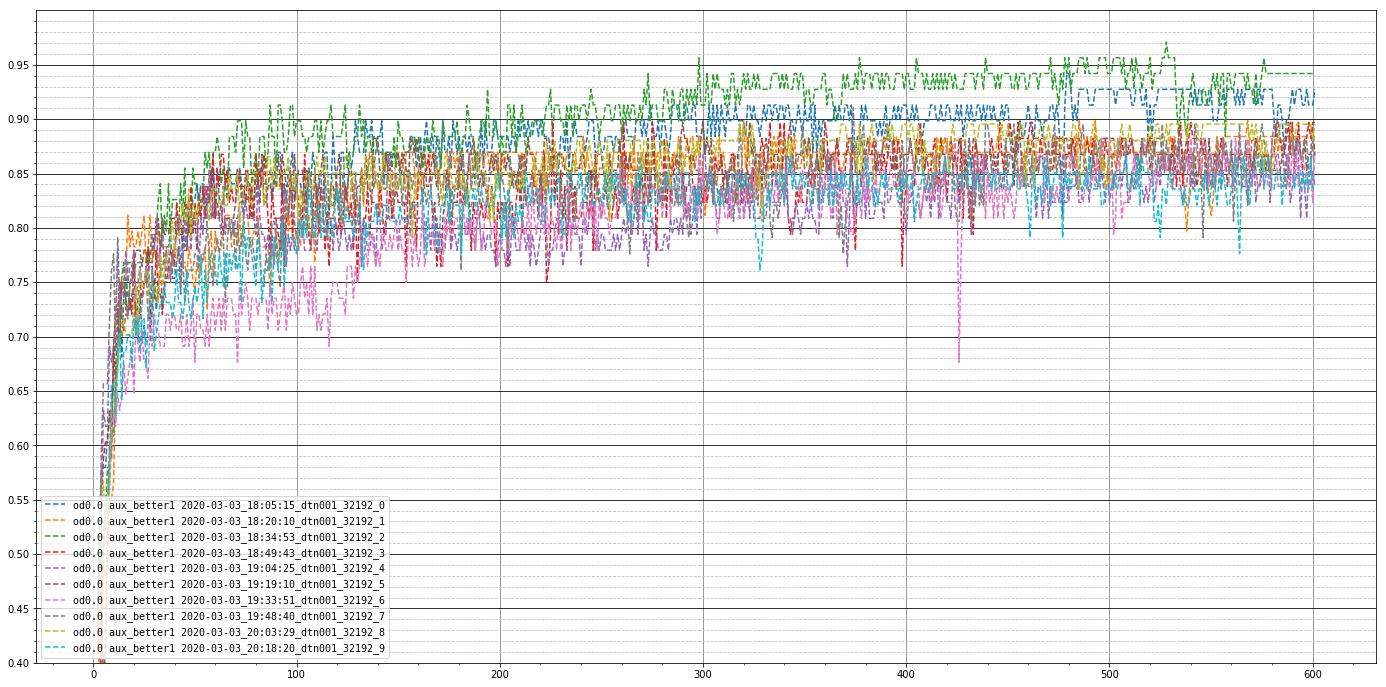

In [325]:
#filter_props = {'output_dropout': [0.2], 'aux_use_better': [True]}
filter_props = {'output_dropout': [0.0], 'aux_use_better': [True]}
#filter_props = {'output_dropout': [0.2], 'aux_use_better': [False]}
#filter_props = {'output_dropout': [0.0], 'aux_use_better': [False]}

plot_logs(logs, hyps, lower_ylim=0.40, display_list=display_list, legend_loc='lower left', plot_list=['valid_acc'], filter_props=filter_props)

In [326]:
avg_over_kfold(logs, hyps, display_list=display_list)

{'od0.0 aux_better0 2020-03-03_16:50:13_dtn000_32191': array([[0.86001673]]),
 'od0.0 aux_better1 2020-03-03_18:05:15_dtn001_32192': array([[0.88212264]]),
 'od0.2 aux_better0 2020-03-03_18:13:16_dtn002_32193': array([[0.76902189]]),
 'od0.2 aux_better1 2020-03-03_18:34:08_dtn003_32194': array([[0.85002291]])}

## AMD Frozen Transfer

In [218]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/devmap_logs/transformer_transfer_amd'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

In [219]:
!ls {str(log_dir.parent)}

transformer_transfer_amd  transformer_transfer_nvidia


In [220]:
logs, hyps = get_all_runs(log_dir, fuse_by_name=False, silent=True)

Getting all runs from transformer_transfer_amd


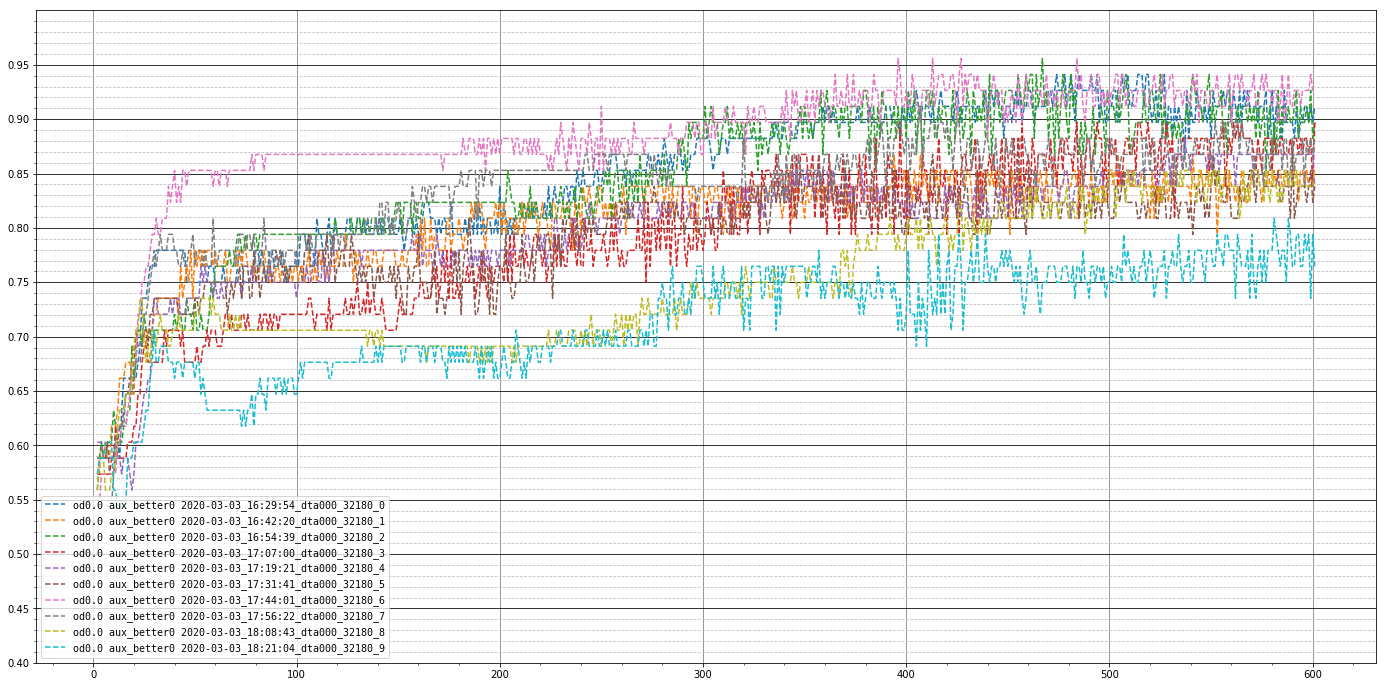

In [225]:
display_list = ['output_dropout', 'aux_use_better']

#filter_props = {'output_dropout': [0.2], 'aux_use_better': [True]}
#filter_props = {'output_dropout': [0.0], 'aux_use_better': [True]}
#filter_props = {'output_dropout': [0.2], 'aux_use_better': [False]}
filter_props = {'output_dropout': [0.0], 'aux_use_better': [False]}

plot_logs(logs, hyps, lower_ylim=0.40, display_list=display_list, legend_loc='lower left', plot_list=['valid_acc'], filter_props=filter_props)

In [222]:
avg_over_kfold(logs, hyps, display_list=display_list)

{'od0.0 aux_better0 2020-03-03_16:29:54_dta000_32180': 0.8661764740943905,
 'od0.0 aux_better1 2020-03-03_16:47:24_dta001_32188': 0.8941176474094388,
 'od0.2 aux_better1 2020-03-03_16:50:13_dta003_32190': 0.8441176474094387,
 'od0.2 aux_better0 2020-03-03_16:50:15_dta002_32189': 0.8249999999999996}

## NVIDIA Supervised Baseline

In [348]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/devmap_logs/transformer_supervised_nvidia'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

In [349]:
!ls {str(log_dir.parent)}

transformer_supervised_amd     transformer_transfer_amd
transformer_supervised_nvidia  transformer_transfer_nvidia


In [350]:
logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from transformer_supervised_nvidia


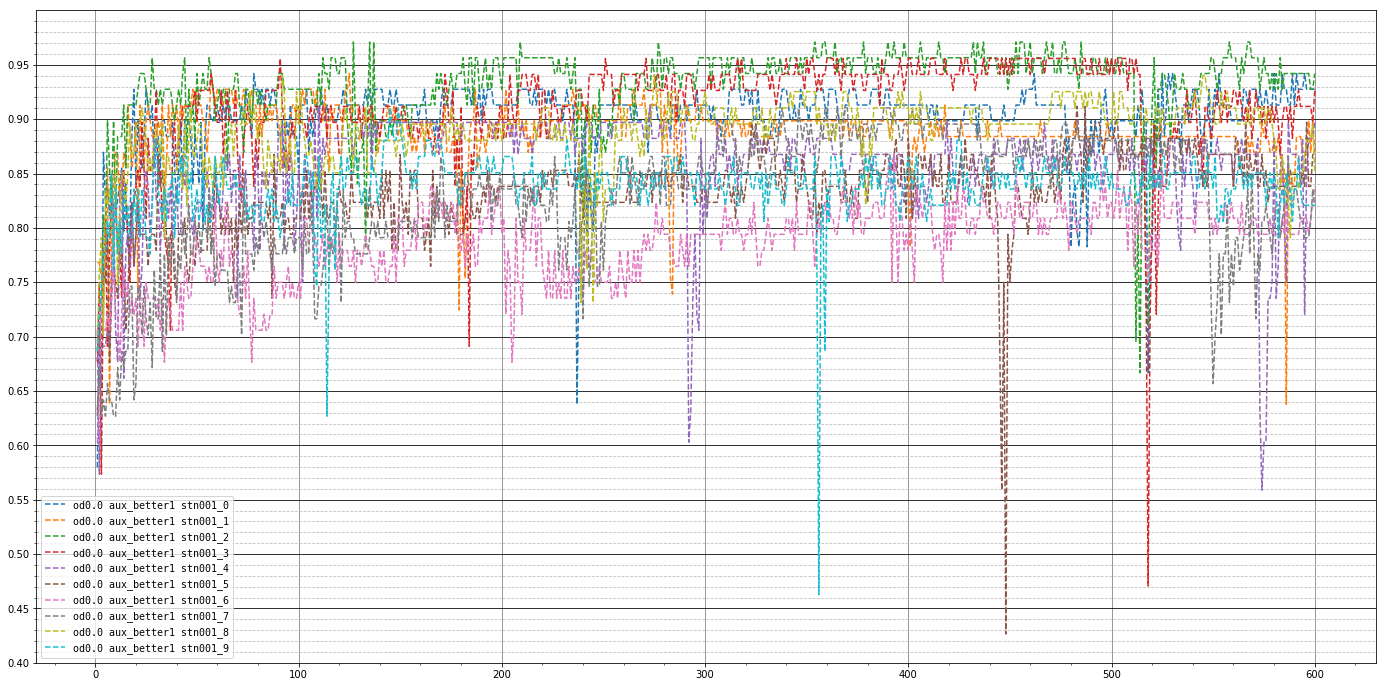

In [351]:
display_list = ['output_dropout', 'aux_use_better']

#filter_props = {'output_dropout': [0.2], 'aux_use_better': [True]}
filter_props = {'output_dropout': [0.0], 'aux_use_better': [True]}
#filter_props = {'output_dropout': [0.2], 'aux_use_better': [False]}
#filter_props = {'output_dropout': [0.0], 'aux_use_better': [False]}

plot_logs(logs, hyps, lower_ylim=0.40, display_list=display_list, legend_loc='lower left', plot_list=['valid_acc'], filter_props=filter_props)

In [352]:
avg_over_kfold(logs, hyps, display_list=display_list)

{'od0.0 aux_better0 stn000': array([[0.88809406]]),
 'od0.0 aux_better1 stn001': array([[0.87610795]])}

## AMD Supervised Baseline

In [357]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/devmap_logs/transformer_supervised_amd'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub
!ls {str(log_dir.parent)}

transformer_supervised_amd     transformer_transfer_amd
transformer_supervised_nvidia  transformer_transfer_nvidia


In [358]:
logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from transformer_supervised_amd


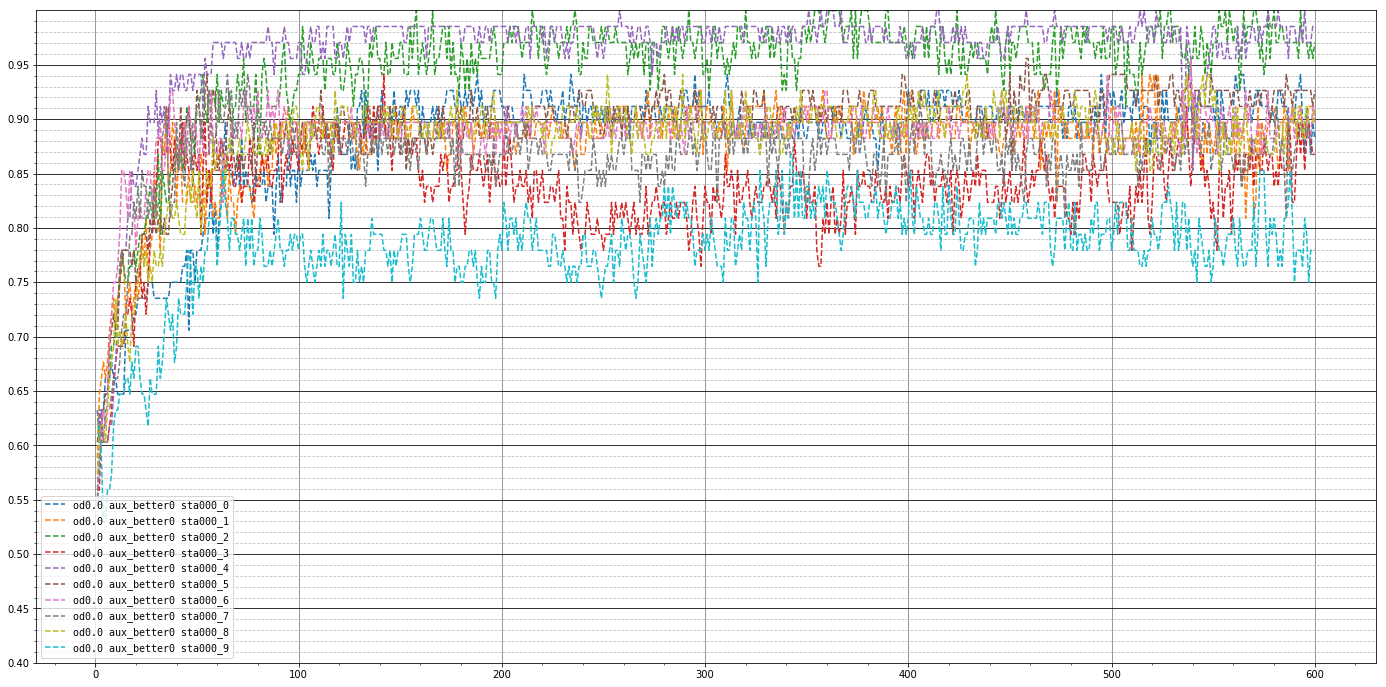

In [359]:
display_list = ['output_dropout', 'aux_use_better']

#filter_props = {'output_dropout': [0.2], 'aux_use_better': [True]}
#filter_props = {'output_dropout': [0.0], 'aux_use_better': [True]}
#filter_props = {'output_dropout': [0.2], 'aux_use_better': [False]}
filter_props = {'output_dropout': [0.0], 'aux_use_better': [False]}

plot_logs(logs, hyps, lower_ylim=0.40, display_list=display_list, legend_loc='lower left', plot_list=['valid_acc'], filter_props=filter_props)

In [360]:
avg_over_kfold(logs, hyps, display_list=display_list)

{'od0.0 aux_better0 sta000': array([[0.89852942]]),
 'od0.0 aux_better1 sta001': array([[0.88676471]])}

# Redo: Transformer Ablation

In [576]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/classifyapp_logs/transformer_ablation'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

In [577]:
plot_list = ['train_acc', 'valid_acc', 'test_acc']

In [578]:
logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from transformer_ablation


val err 3.17%, test err 3.73% @ ep 77/80
lr0.00025 od0.0 bs128 gnn8
toj000
val err 3.17%, test err 3.77% @ ep 66/80
lr0.00025 od0.0 bs 64 gnn8
toj001
val err 3.36%, test err 3.65% @ ep 63/80
lr0.00050 od0.0 bs128 gnn8
toj002
val err 3.72%, test err 4.12% @ ep 50/80
lr0.00050 od0.0 bs 64 gnn8
toj003
val err 3.13%, test err 3.59% @ ep 67/80
lr0.00025 od0.0 bs 64 gnn8
toA001
val err 3.13%, test err 3.58% @ ep 76/80
lr0.00010 od0.0 bs128 gnn8
toA002
val err 3.21%, test err 3.64% @ ep 79/80
lr0.00010 od0.0 bs 64 gnn8
toA003
val err 3.13%, test err 3.61% @ ep 54/80
lr0.00025 od0.0 bs128 gnn10
toA004
val err 3.28%, test err 3.67% @ ep 38/80
lr0.00025 od0.0 bs 64 gnn10
toA005
val err 3.16%, test err 3.40% @ ep 70/80
lr0.00010 od0.0 bs128 gnn10
toA006
val err 3.06%, test err 3.33% @ ep 78/80
lr0.00010 od0.0 bs 64 gnn10
toA007
val err 3.23%, test err 3.81% @ ep 67/80
lr0.00025 od0.0 bs128 gnn6
toA008
val err 3.09%, test err 3.67% @ ep 56/80
lr0.00025 od0.0 bs 64 gnn6
toA009
val err 3.56%, test e

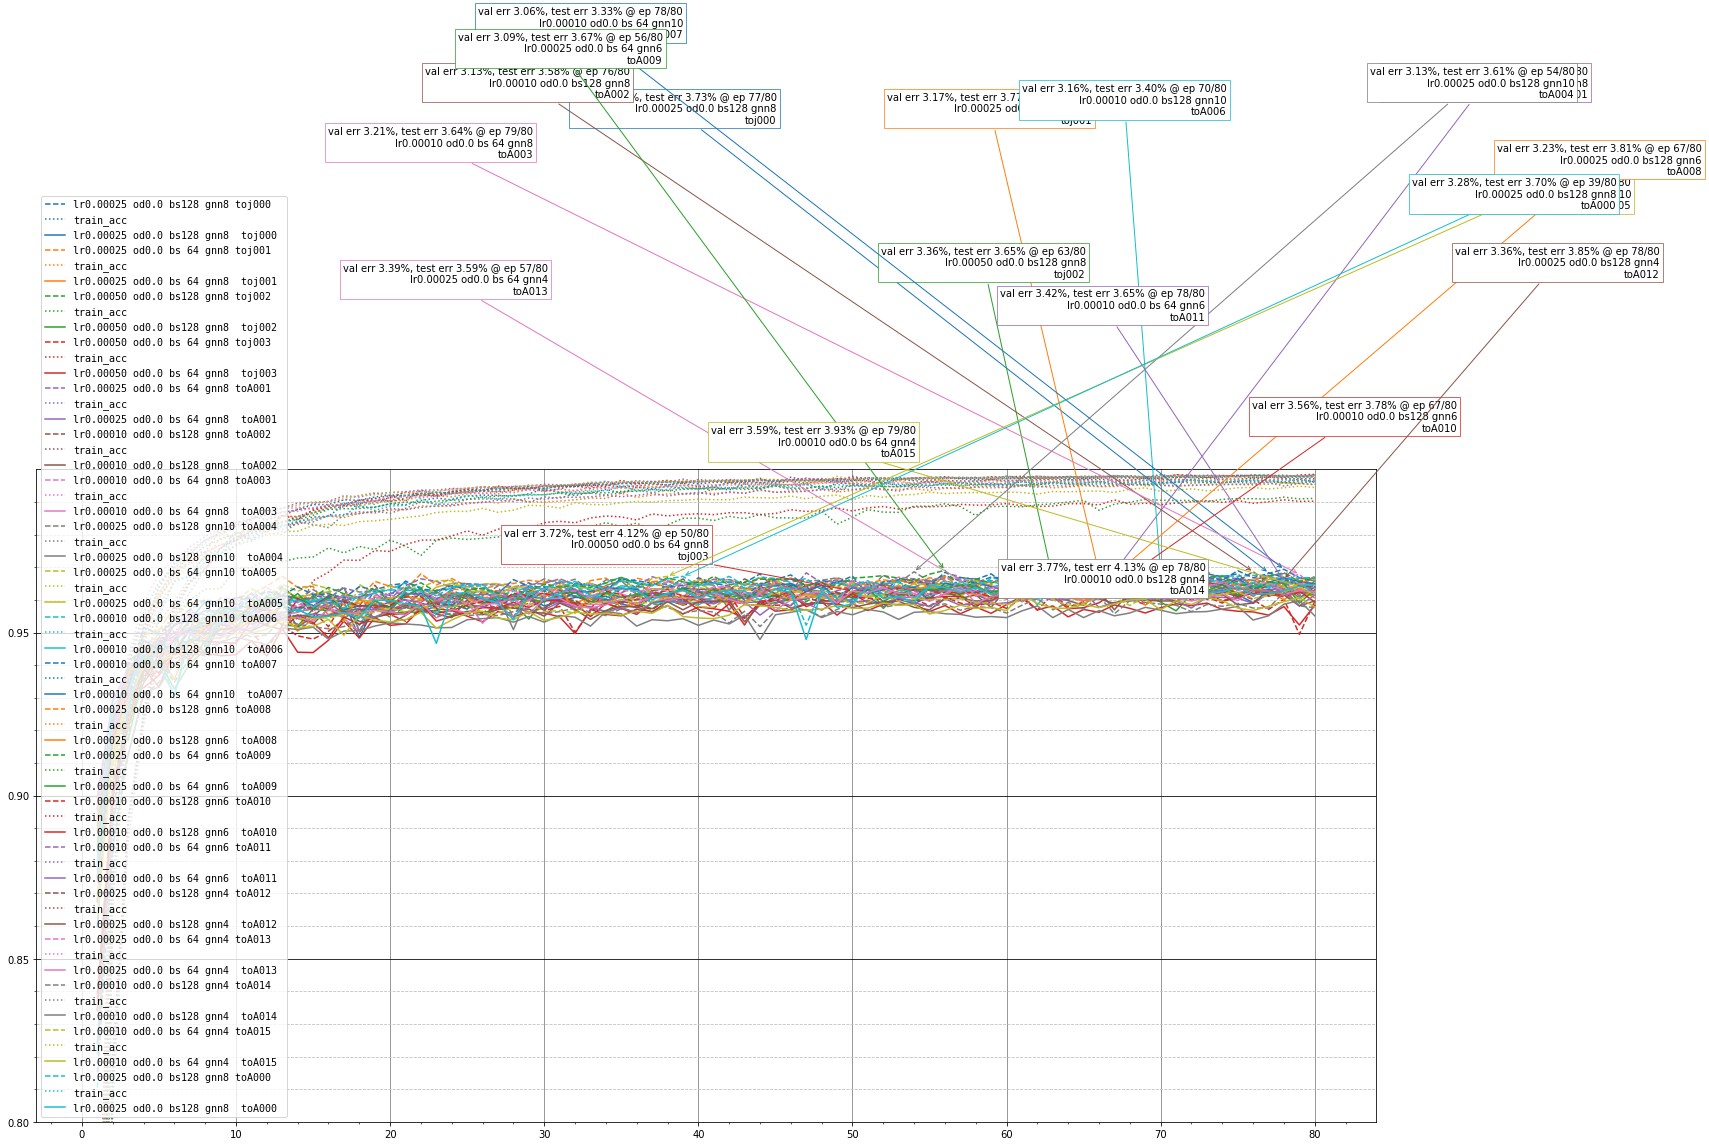

In [579]:
display_list = ['lr', 'output_dropout', 'batch_size', 'gnn_layers']

plot_logs(logs, hyps, lower_ylim=0.80, display_list=display_list, legend_loc='lower left', plot_list=plot_list)

In [581]:
v1 = np.array([3.17, 3.28])
np.mean(v1), np.std(v1)

(3.2249999999999996, 0.05499999999999994)

In [582]:
v1 = np.array([3.13, 3.17])
np.mean(v1), np.std(v1)

(3.15, 0.020000000000000018)

In [591]:
100 - (3.33/5.17* 100)

35.589941972920684

# Redo GGNN (A) Layer Ablation

In [583]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/classifyapp_logs/ggnn_ablation_A/'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

In [584]:
plot_list = ['train_acc', 'valid_acc', 'test_acc']

In [585]:
logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from ggnn_ablation_A


val err 3.24%, test err 3.78% @ ep 75/80
lr0.00025 od0.0 bs128 gnn8 ushar1
o1A000
val err 3.31%, test err 3.75% @ ep 62/80
lr0.00025 od0.0 bs128 gnn10 ushar1
o1A001
val err 3.52%, test err 3.70% @ ep 78/80
lr0.00025 od0.0 bs128 gnn10 ushar2
o2A001
val err 3.51%, test err 3.99% @ ep 61/80
lr0.00025 od0.0 bs128 gnn6 ushar2
o2A002
val err 3.47%, test err 3.80% @ ep 67/80
lr0.00025 od0.0 bs128 gnn4 ushar1
o1A003
val err 3.47%, test err 4.18% @ ep 75/80
lr0.00025 od0.0 bs128 gnn8 ushar2
o2A000
val err 3.44%, test err 3.83% @ ep 55/80
lr0.00025 od0.0 bs128 gnn6 ushar1
o1A002
val err 3.68%, test err 4.02% @ ep 62/80
lr0.00025 od0.0 bs128 gnn4 ushar2
o2A003
val err 3.39%, test err 3.66% @ ep 78/80
lr0.00025 od0.0 bs128 gnn12 ushar2
o2A004


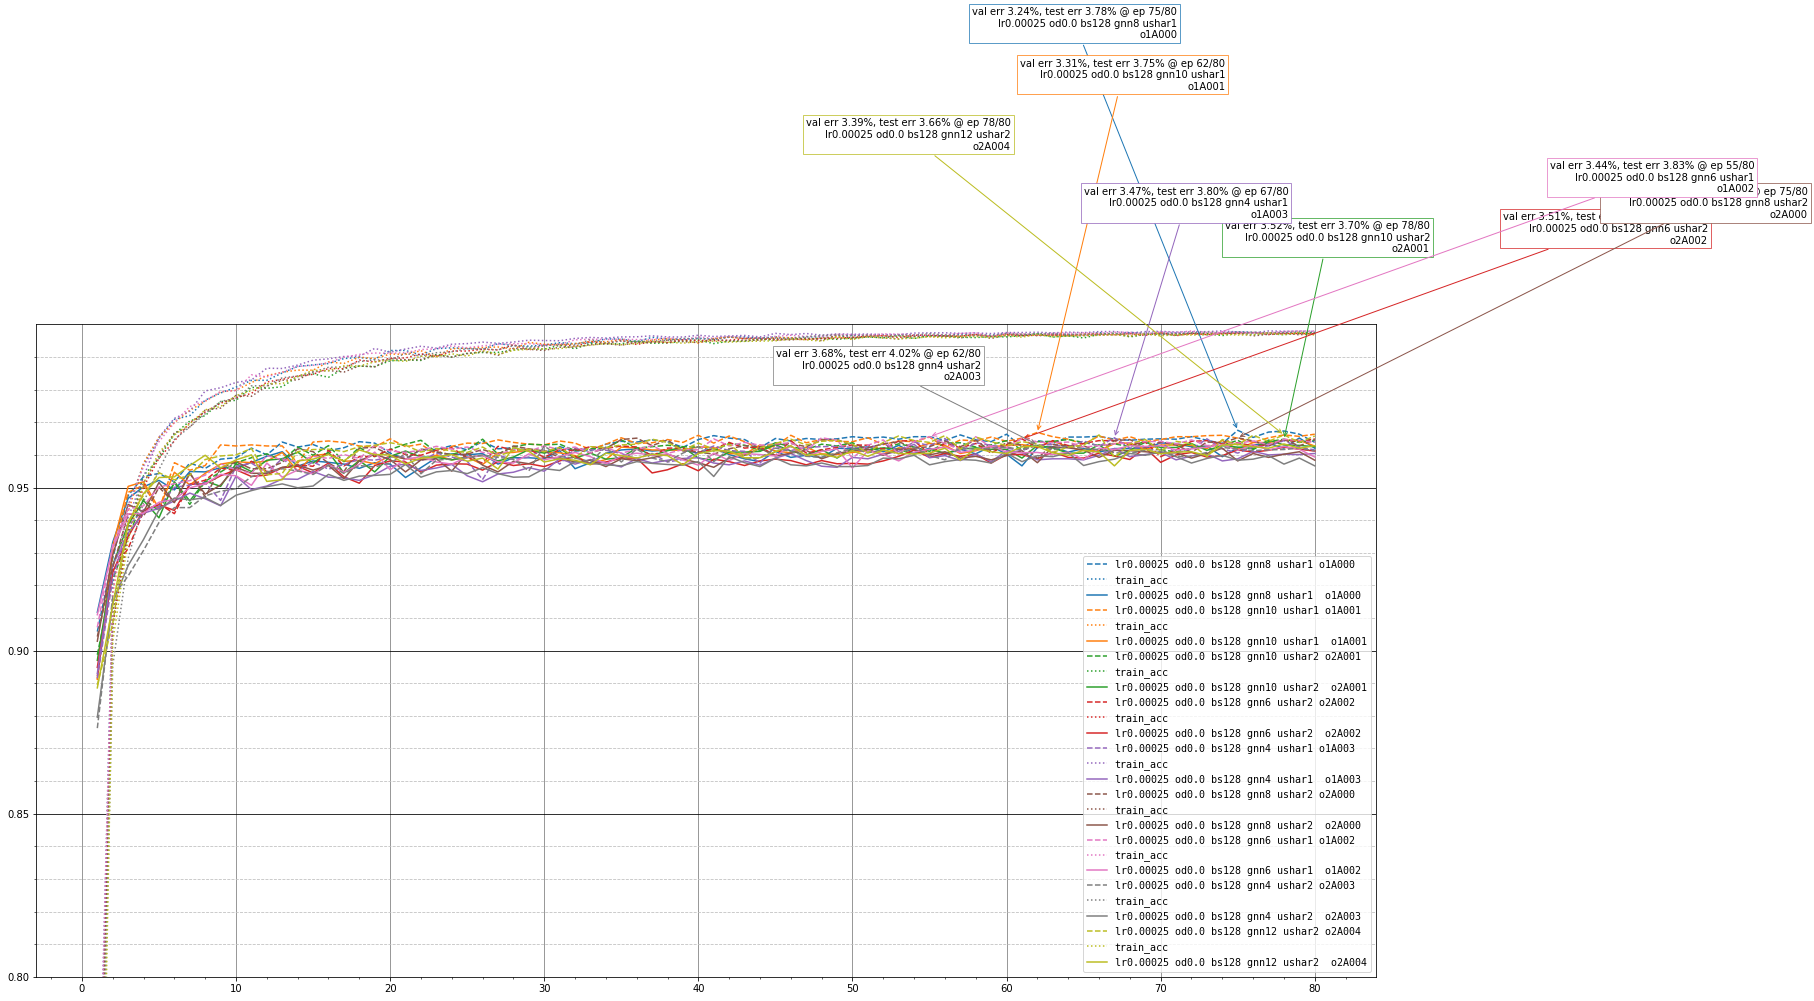

In [587]:
display_list = ['lr', 'output_dropout', 'batch_size', 'gnn_layers', 'use_position_embs', 'update_weight_sharing']

plot_logs(logs, hyps, lower_ylim=0.80, display_list=display_list, legend_loc='best', plot_list=plot_list)

In [594]:
100 - 100*(3.78/5.17)

26.885880077369436

# Transformer Pretraining

In [194]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/ncc_logs/transformer/'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

In [195]:
!ls {log_dir.parent}

ggnn  ggnn_with_pos  transformer


In [196]:
logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from transformer


In [197]:
logs.keys()

dict_keys(['000', '001', '002'])

In [205]:
get_best_valid_acc(logs, '000')

epoch         time  train_loss  train_acc  train_speed  train_ppl  \
18     99  5887.883492    0.033908   0.988968    61.242837   1.034490   
19    100  6195.881376    0.035611   0.988329    62.528882   1.036252   

    train_art  train_ort  valid_loss  valid_acc  valid_speed  valid_ppl  \
18          0          0    0.079177   0.983770   152.374614   1.082396   
19          0          0    0.077515   0.983755   152.175933   1.080599   

    valid_art  valid_ort  
18          0          0  
19          0          0

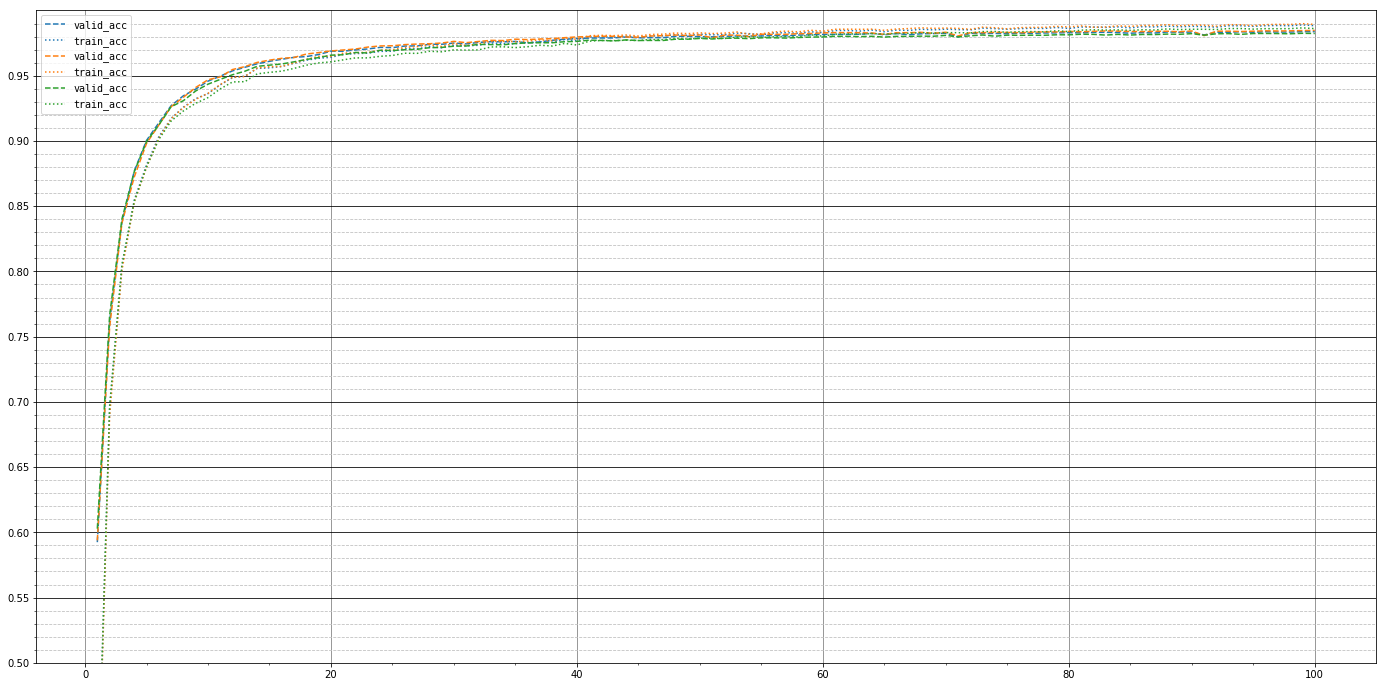

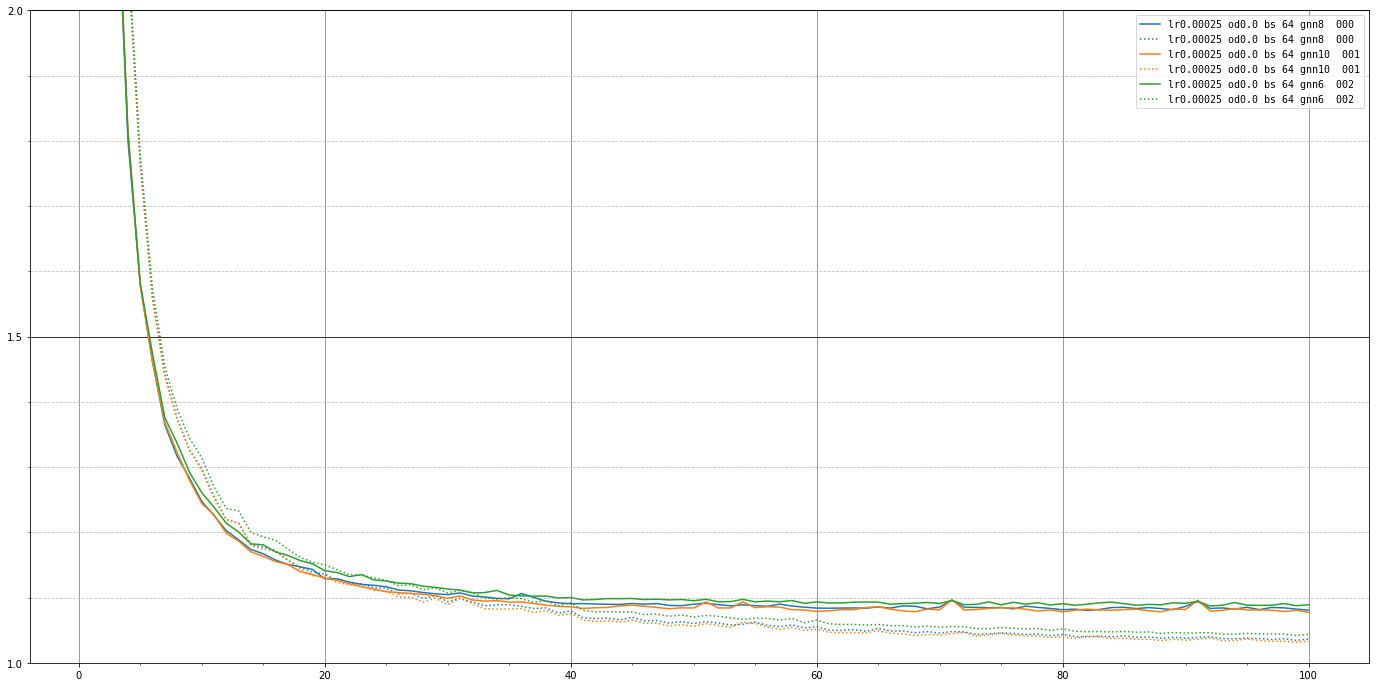

In [15]:
display_list = ['lr', 'output_dropout', 'batch_size', 'gnn_layers']

plot_logs(logs, hyps, lower_ylim=0.50, display_list=display_list, legend_loc='best')

# GGNN Pretraining

In [207]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/ncc_logs/ggnn/'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

In [208]:
! ls {log_dir.parent}

ggnn  ggnn_with_pos  transformer


In [209]:
logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from ggnn


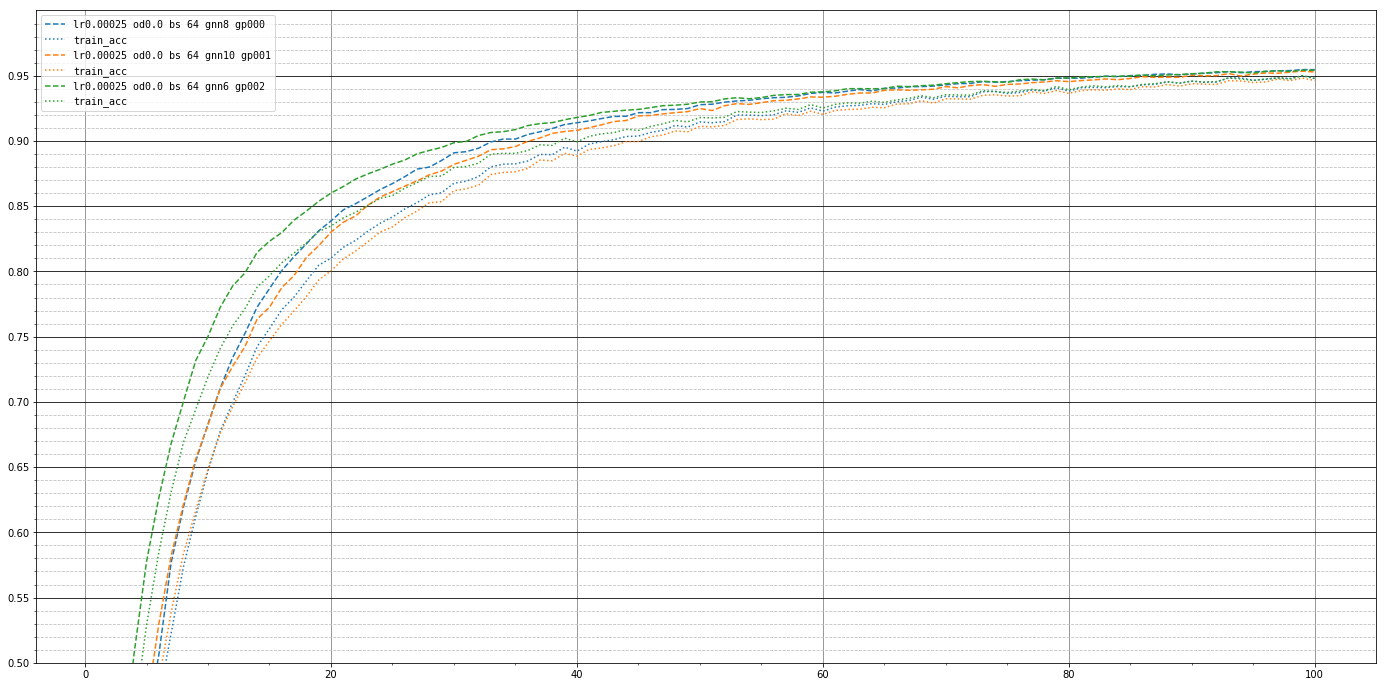

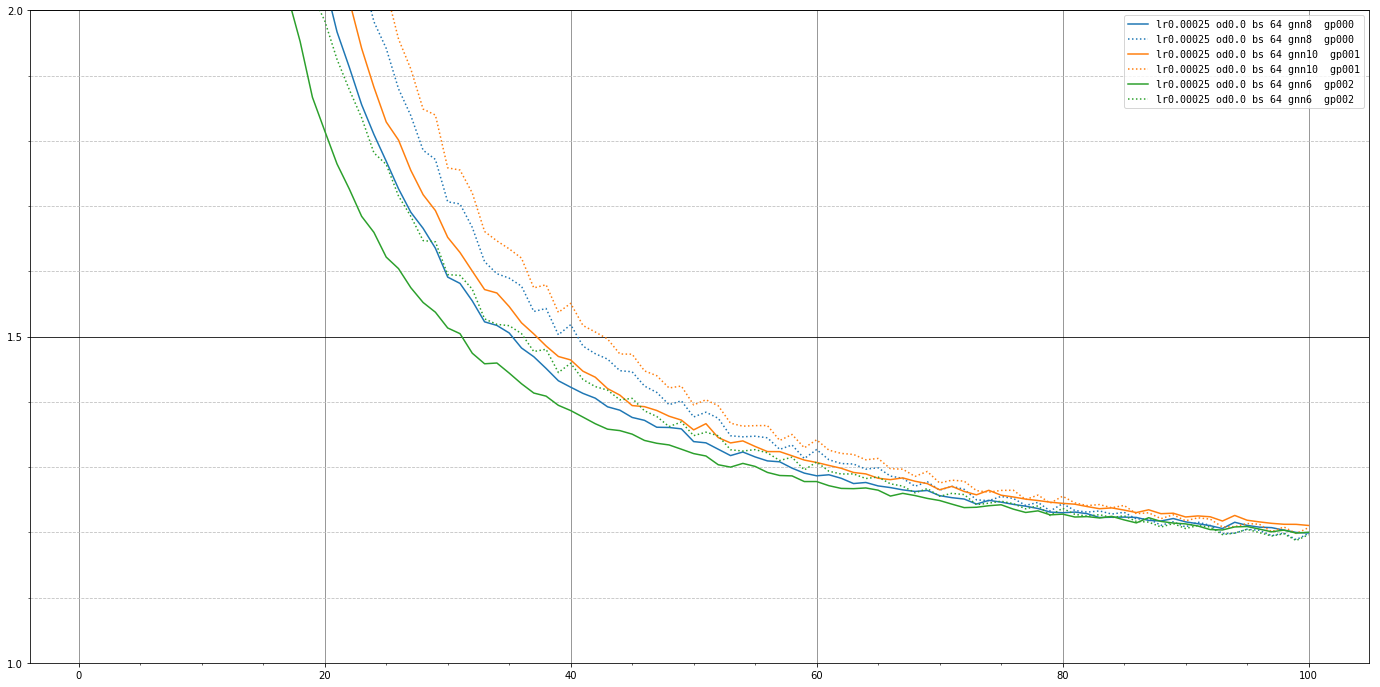

In [210]:
display_list = ['lr', 'output_dropout', 'batch_size', 'gnn_layers']

plot_logs(logs, hyps, lower_ylim=0.50, display_list=display_list, legend_loc='best')

In [211]:

logs.keys()

dict_keys(['gp000', 'gp001', 'gp002'])

In [212]:
get_best_valid_acc(logs, 'gp000')

epoch         time  train_loss  train_acc  train_speed  train_ppl  \
18     99  2774.767438    0.172933   0.949966   133.311191   1.188786   
19    100  2919.876728    0.180898   0.947800   135.774728   1.198293   

    train_art  train_ort  valid_loss  valid_acc  valid_speed  valid_ppl  \
18          0          0    0.182171   0.954680   239.477381   1.199819   
19          0          0    0.181485   0.954673   238.946914   1.198997   

    valid_art  valid_ort  
18          0          0  
19          0          0

## GGNN with Pos

In [214]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/ncc_logs/ggnn_with_pos/'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub

In [215]:
logs, hyps = get_all_runs(log_dir, fuse_by_name=True, silent=True)

Getting all runs from ggnn_with_pos


In [216]:
get_best_valid_acc(logs, 'gPp000')

epoch         time  train_loss  train_acc  train_speed  train_ppl  \
19    100  3920.875234    0.139892   0.958911   102.005579   1.150149   

    train_art  train_ort  valid_loss  valid_acc  valid_speed  valid_ppl  \
19          0          0    0.151655    0.96318   160.982688   1.163758   

    valid_art  valid_ort  
19          0          0

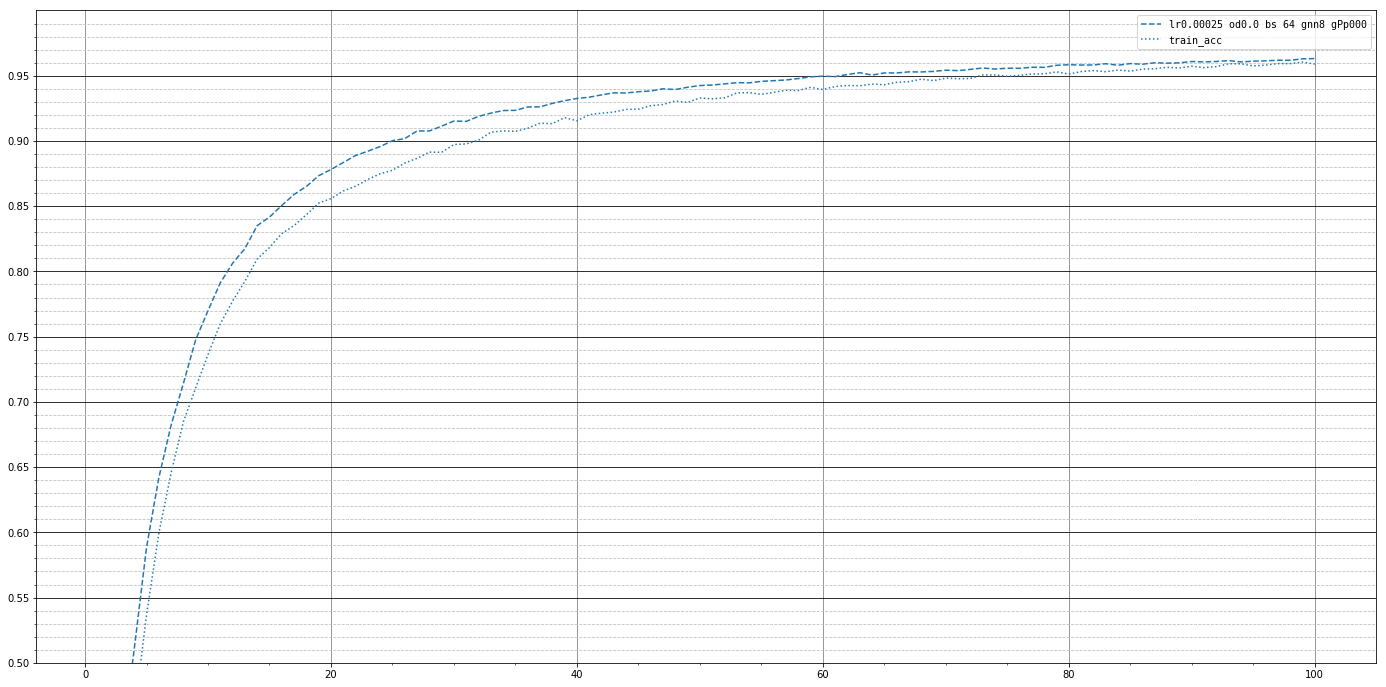

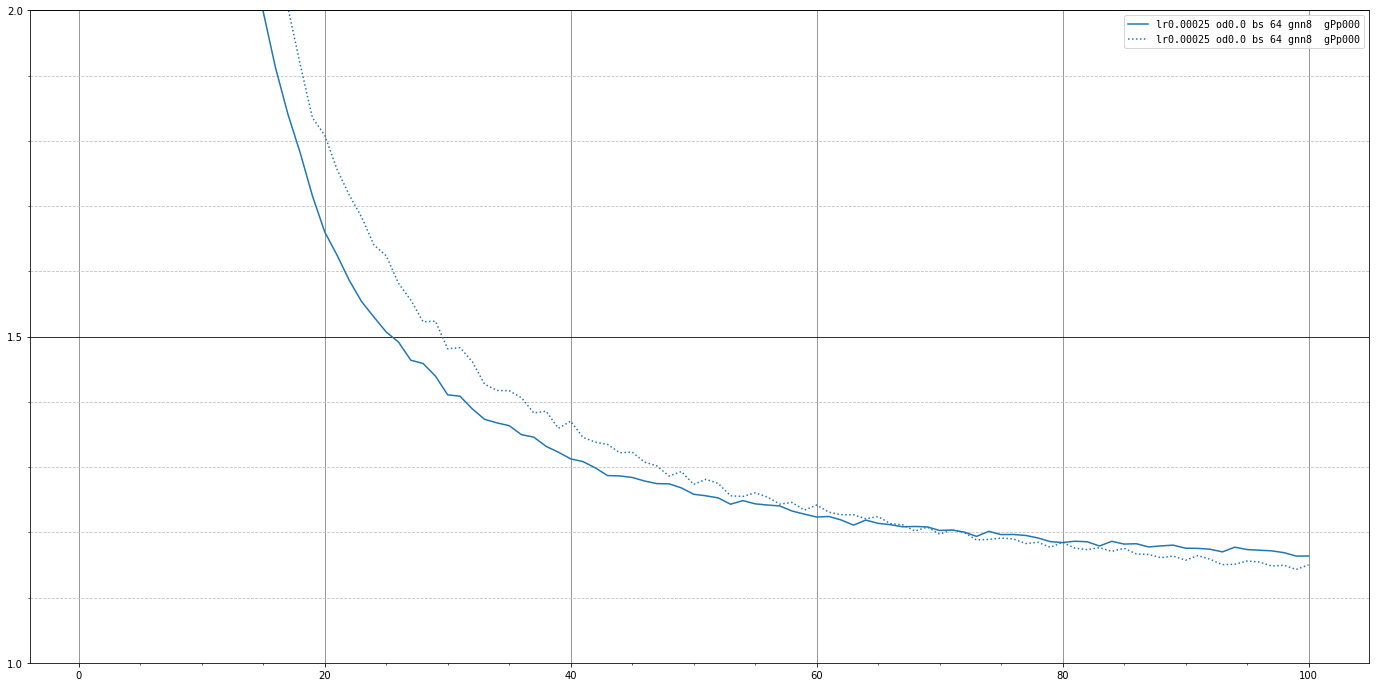

In [188]:
display_list = ['lr', 'output_dropout', 'batch_size', 'gnn_layers']

plot_logs(logs, hyps, lower_ylim=0.50, display_list=display_list, legend_loc='best')

# GGNN (A) - Layer Ablation

run_over_layer_timesteps
2020-01-23_04:44:49_poj003_24508
2020-01-23_04:42:19_poj002_24507
2020-01-23_05:33:53_poj004_24509
2020-01-23_04:41:44_poj001_24506
2020-01-23_04:40:57_poj000_24505


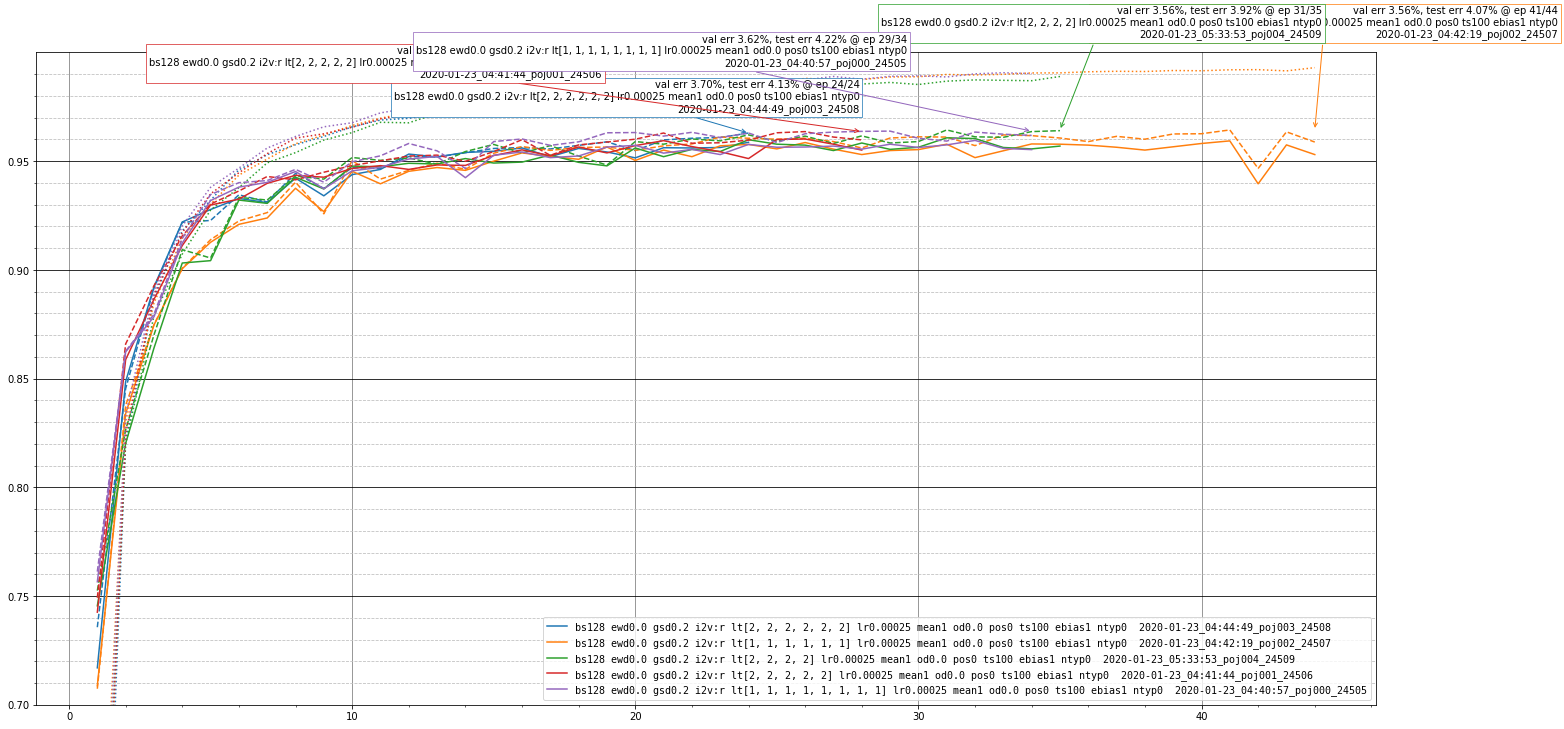

In [62]:
# set log_dir
#sub = 'ault_logs_mirror/example_subfolder'
#sub = 'ault_logs_mirror/sub10_ts4x2_bs64'
#sub = 'ault_logs_mirror/basic_run_full_subset_01-21_weird_testset/'
#sub = 'ault_logs_mirror/large_run_full_subset/'
#sub = 'ault_logs_mirror/run_over_binary_choices/'
sub = 'ault_logs_mirror/run_over_layer_timesteps/'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/classifyapp_logs' / sub
#!ls -a {log_dir} | grep log
logs, hyps = get_all_runs(log_dir, upper_bound_epochs=60)
plot_logs(logs, hyps, lower_ylim=0.7, display_list=None, legend_loc='lower right')

# GGNN (B) - run_over_binary_choices

run_over_binary_choices
2020-01-23_01:36:53_poj009_24498
2020-01-23_04:38:45_poj013_24502
2020-01-23_01:33:36_poj000_24489
2020-01-23_04:35:01_poj012_24501
2020-01-23_01:35:34_poj001_24490
2020-01-23_01:35:52_poj004_24493
2020-01-23_01:36:53_poj008_24497
2020-01-23_01:35:52_poj005_24494


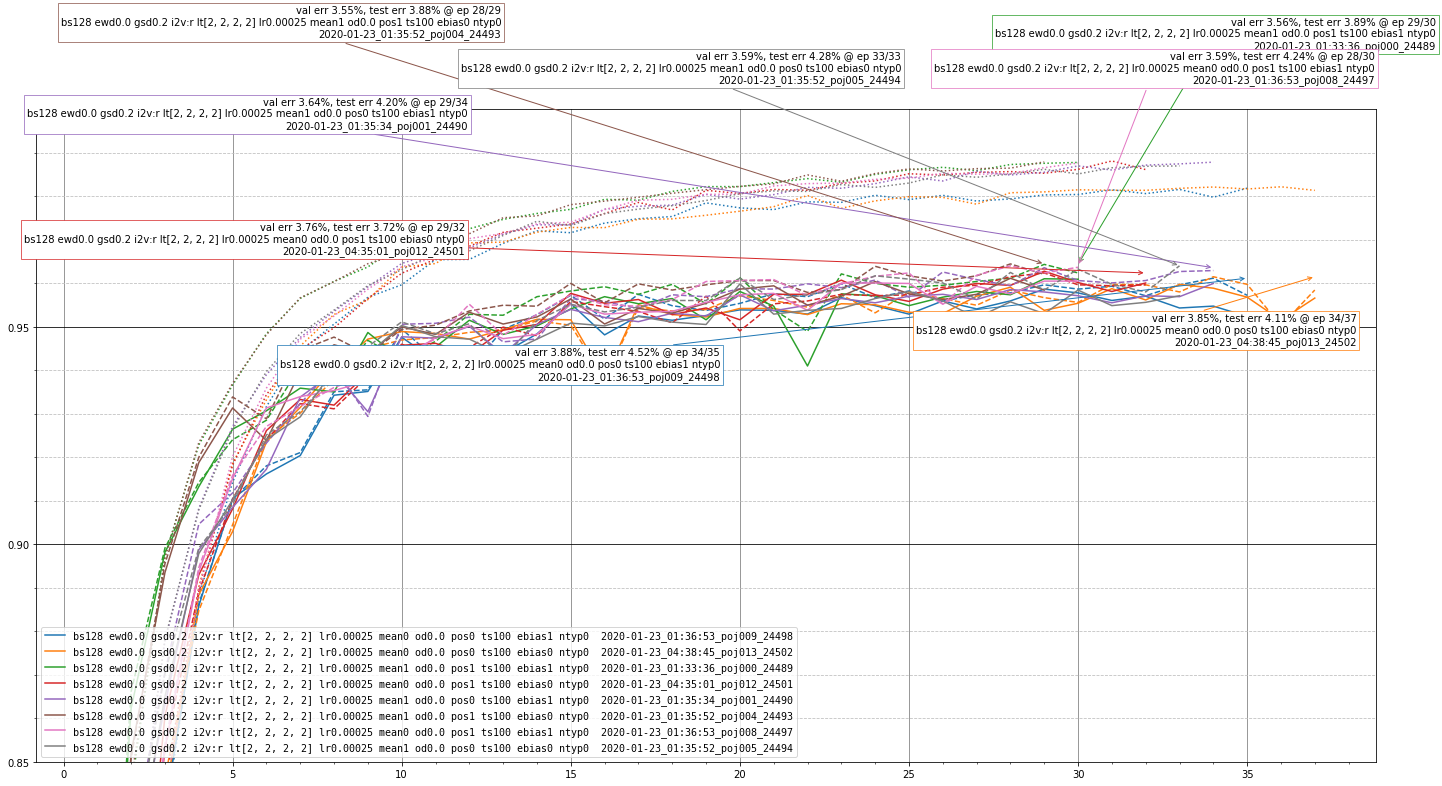

In [59]:
# set log_dir
#sub = 'ault_logs_mirror/example_subfolder'
#sub = 'ault_logs_mirror/sub10_ts4x2_bs64'
#sub = 'ault_logs_mirror/basic_run_full_subset_01-21_weird_testset/'
#sub = 'ault_logs_mirror/large_run_full_subset/'
sub = 'ault_logs_mirror/run_over_binary_choices/'
#sub = 'ault_logs_mirror/run_over_layer_timesteps/'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/classifyapp_logs' / sub
#!ls -a {log_dir} | grep log
logs, hyps = get_all_runs(log_dir)
plot_logs(logs, hyps)

# GGNN (C) - run_with_node_types_and_structure_only

run_with_node_types_and_structure_only
2020-01-23_23:00:54_nty002_24539
2020-01-23_18:25:55_nty001_24533
2020-01-23_20:56:11_nty000_24530
2020-01-24_01:18:36_nty002_24540
2020-01-23_20:43:33_nty003_24542
2020-01-23_18:24:34_nty000_24529
2020-01-23_20:57:43_nty001_24534
2020-01-23_20:43:30_nty002_24538
2020-01-23_23:28:05_nty000_24531
2020-01-24_01:17:52_nty003_24544
2020-01-23_23:29:51_nty001_24535
2020-01-24_02:00:13_nty000_24532
2020-01-24_02:01:47_nty001_24536
2020-01-23_18:25:59_nty002_24537
2020-01-23_18:25:59_nty003_24541
2020-01-23_23:00:52_nty003_24543


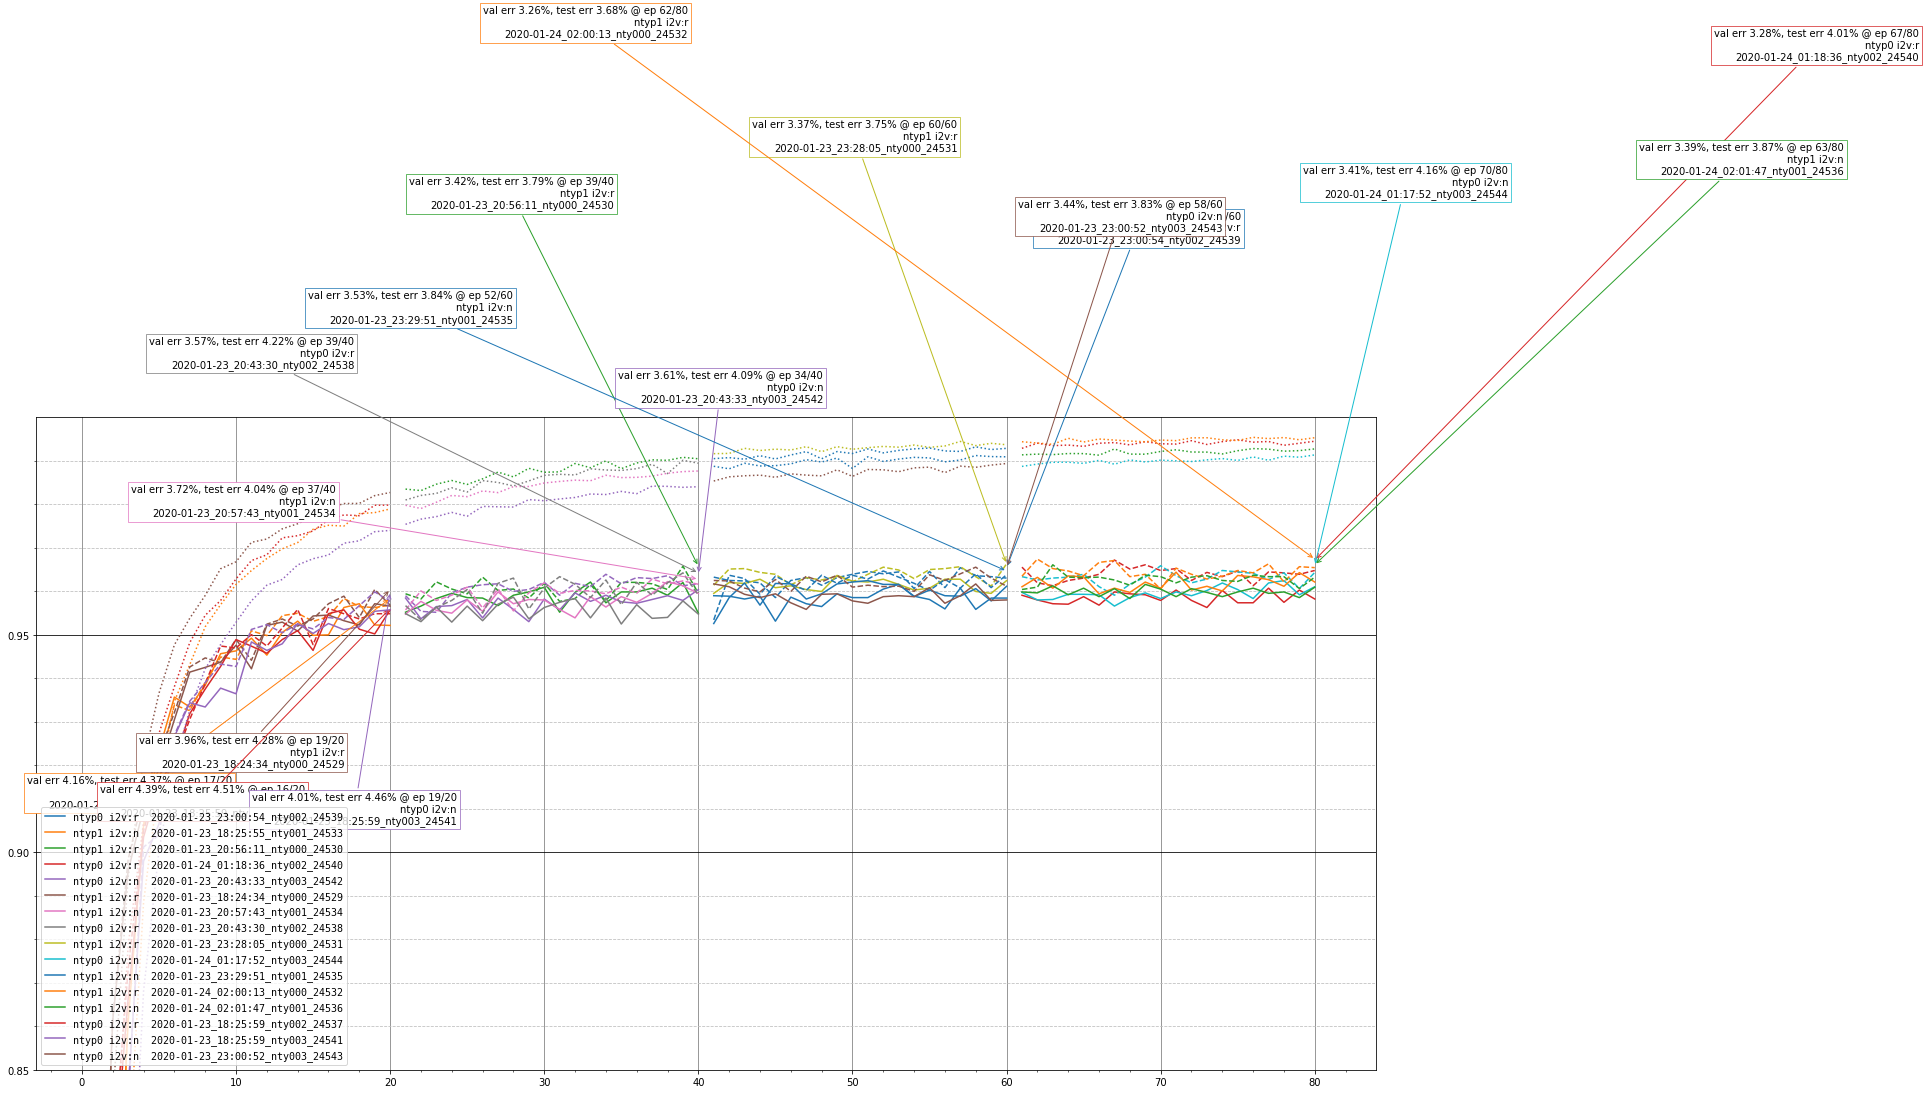

In [60]:
# set log_dir

sub = 'ault_logs_mirror/run_with_node_types_and_structure_only/'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/classifyapp_logs' / sub
#!ls {log_dir.parent}
logs, hyps = get_all_runs(log_dir)
display_list = ['use_node_types', 'inst2vec_embeddings']
plot_logs(logs, hyps, lower_ylim=0.85, display_list=display_list)

# Monitoring Debug Trash Folder

No handles with labels found to put in legend.


debug_trash_folder


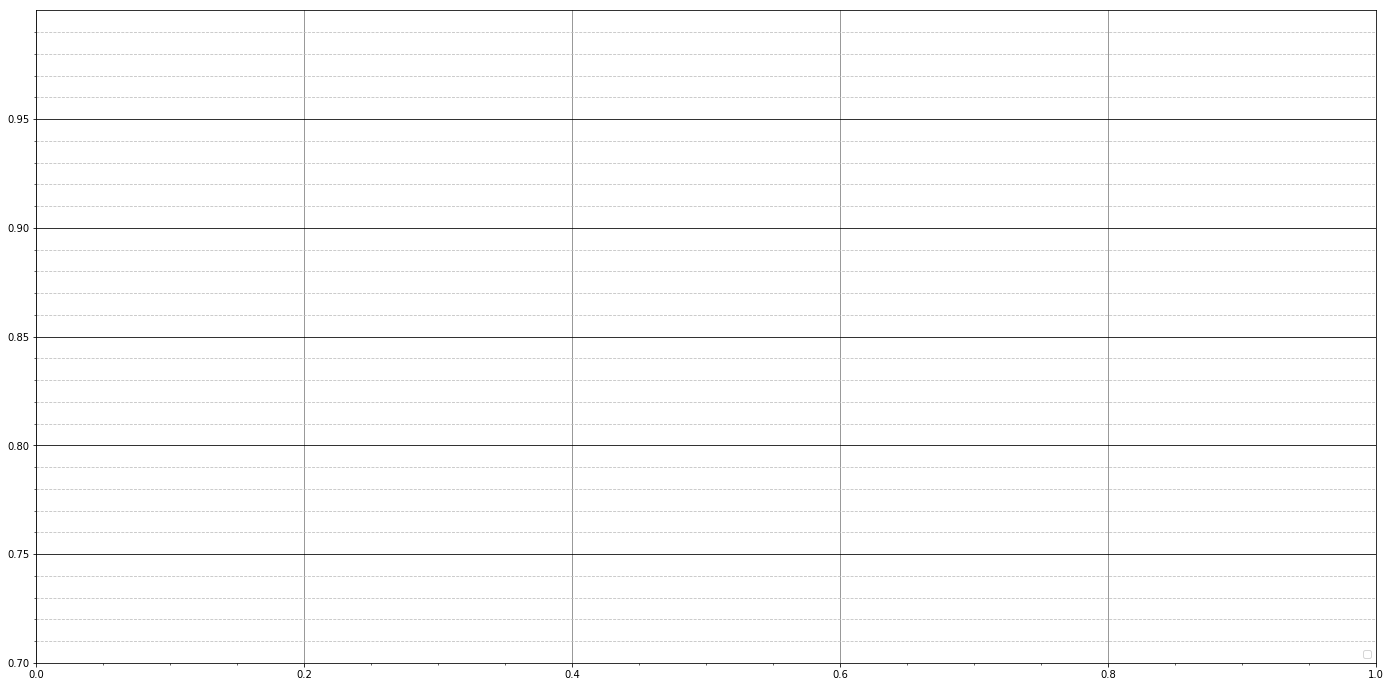

In [73]:
# set log_dir to debug runs 


sub = 'debug_trash_folder'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/classifyapp_logs' / sub
#!ls {log_dir.parent}
logs, hyps = get_all_runs(log_dir)

display_list = ['train_subset', 'lr', 'tfmr_dropout', 'batch_size', 'layer_timesteps']

plot_logs(logs, hyps, lower_ylim=0.7, display_list=display_list, legend_loc='lower right')

ault_logs_mirror
2020-01-14-01-27-02_70964
2020-01-13-18-27-56_24898
2020-01-16-17-05-32_106751
2020-01-16-18-25-12_165949
2020-01-16-15-13-55_99988
2020-01-13-21-43-44_53349
2020-01-17-12-09-32_123049
2020-01-16-14-09-23_150249
2020-01-16-16-13-57_103581
2020-01-17-12-10-19_123115


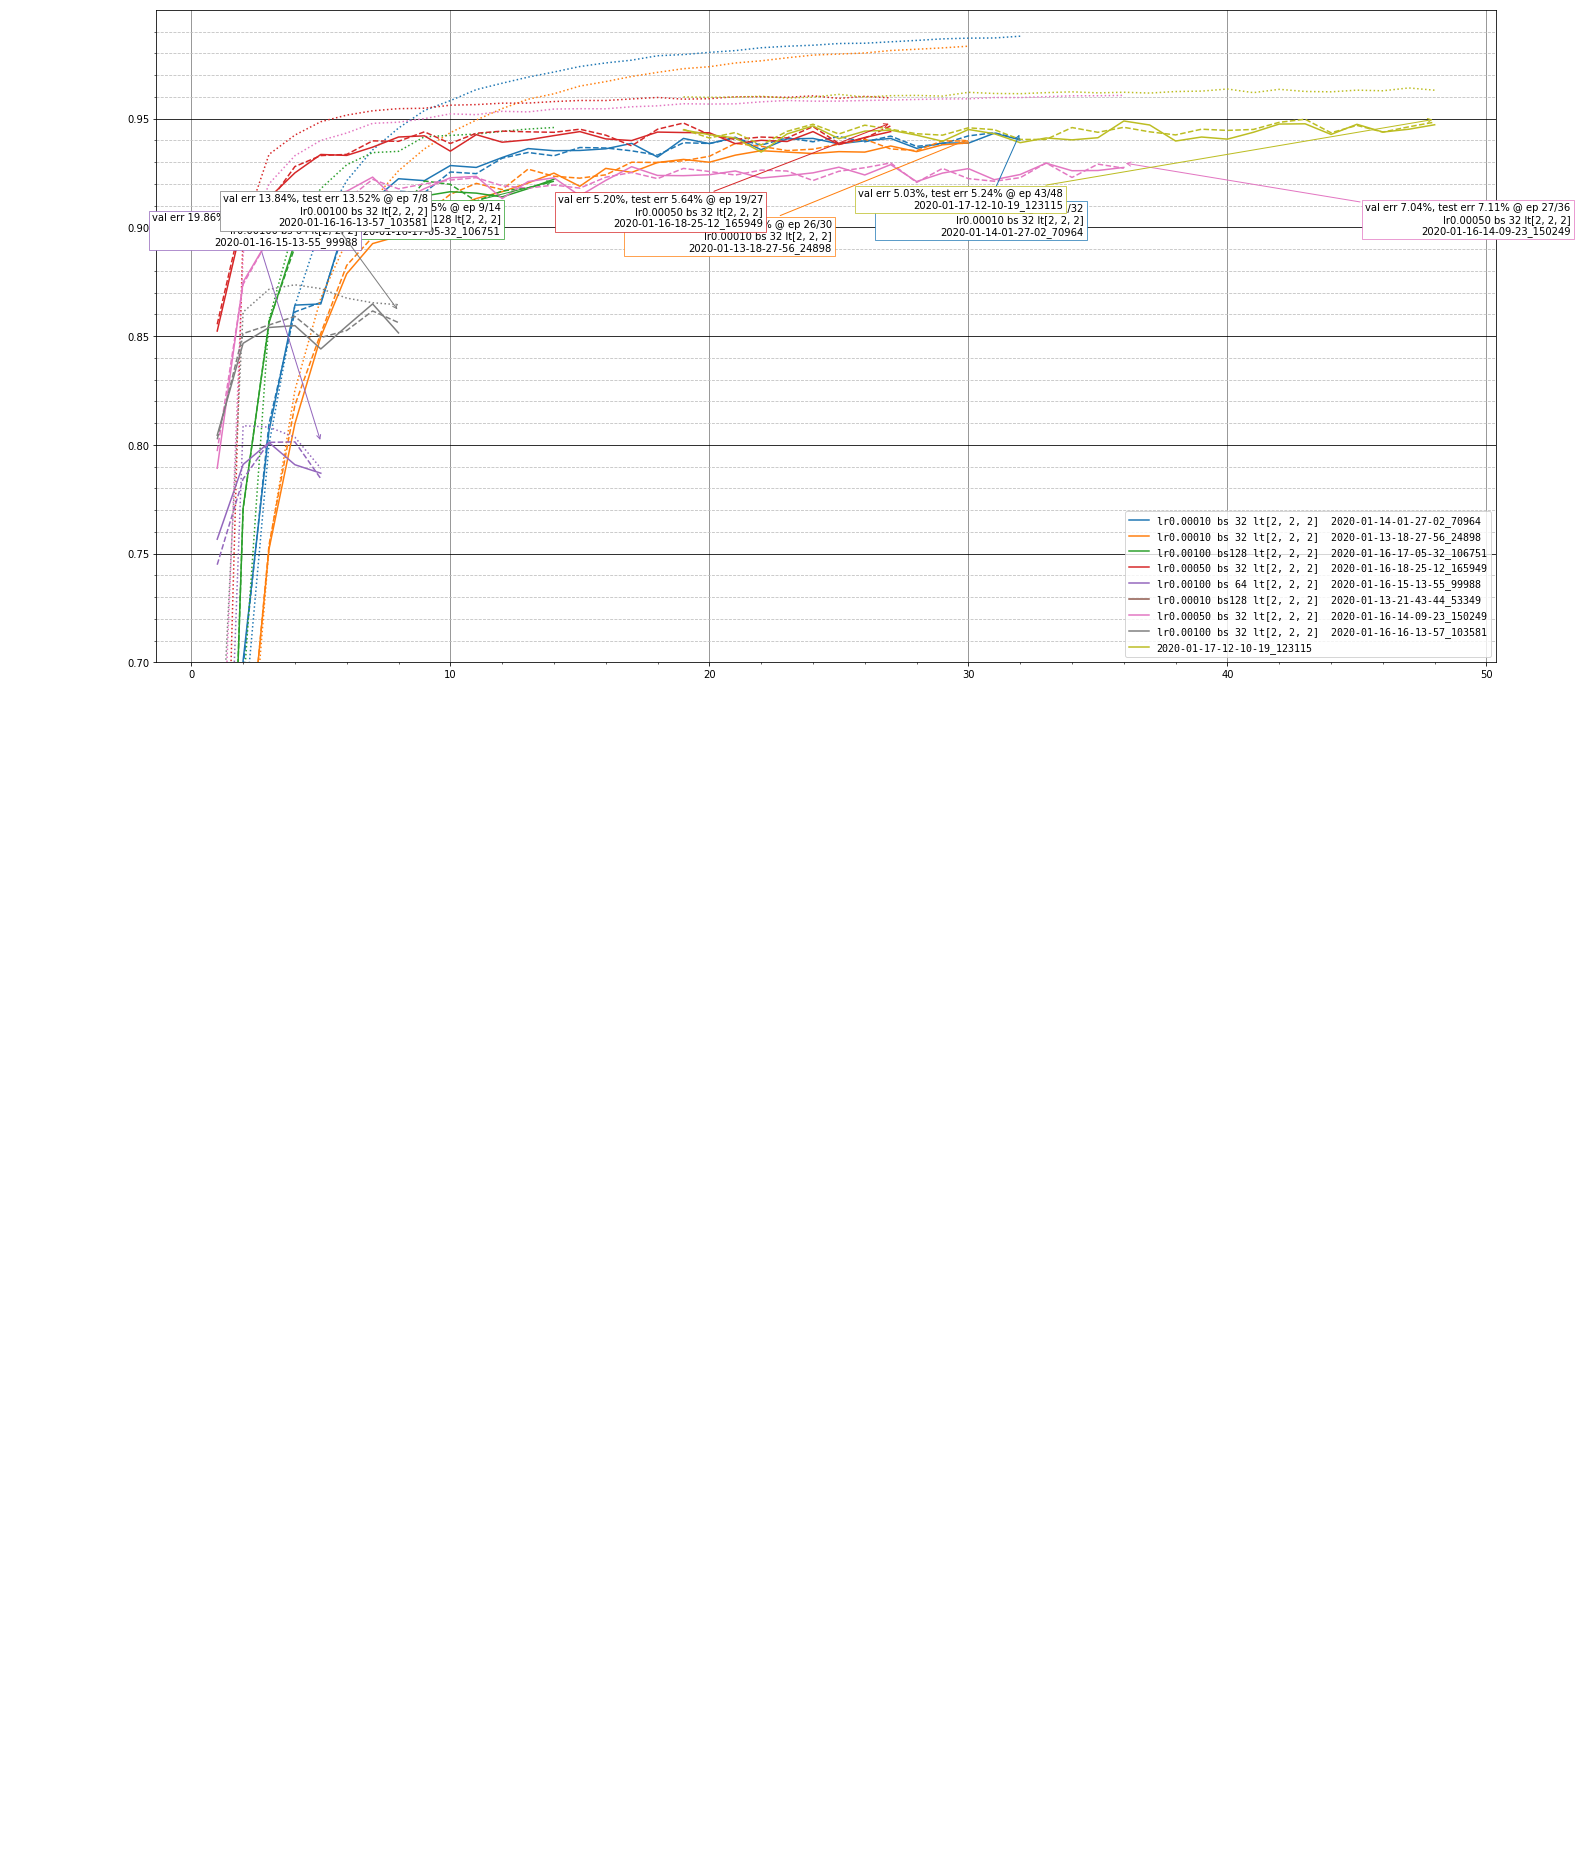

In [97]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/classifyapp_logs' / sub
#!ls {log_dir.parent}
logs, hyps = get_all_runs(log_dir)

display_list = ['train_subset', 'lr', 'tfmr_dropout', 'batch_size', 'layer_timesteps']

plot_logs(logs, hyps, lower_ylim=0.7, display_list=display_list, legend_loc='lower right')

# Transformer Hyperopt

In [101]:
# set log_dir to debug runs 
sub = 'ault_logs_mirror/poj104/transformer_ablation/'
log_dir = repo_root / 'deeplearning/ml4pl/poj104/logs/' / sub
#!ls {log_dir.parent}
logs, hyps = get_all_runs(log_dir, fuse_by_name=True)



Getting all runs from transformer_ablation
2020-02-12_00:41:56_poj000_29201
2020-02-12_00:45:07_poj001_29206
2020-02-12_00:45:07_poj002_29211
2020-02-12_00:47:23_poj003_29216
2020-02-12_00:47:52_poj004_29221
2020-02-12_00:47:57_poj005_29226
2020-02-12_03:44:33_poj000_29202
fusing 2020-02-12_03:44:33_poj000_29202 with poj000
2020-02-12_03:48:08_poj002_29212
fusing 2020-02-12_03:48:08_poj002_29212 with poj002
2020-02-12_03:50:30_poj001_29207
fusing 2020-02-12_03:50:30_poj001_29207 with poj001
2020-02-12_03:52:58_poj003_29217
fusing 2020-02-12_03:52:58_poj003_29217 with poj003
2020-02-12_03:56:51_poj004_29222
fusing 2020-02-12_03:56:51_poj004_29222 with poj004
2020-02-12_04:04:04_poj005_29227
fusing 2020-02-12_04:04:04_poj005_29227 with poj005
2020-02-12_06:47:32_poj000_29203
fusing 2020-02-12_06:47:32_poj000_29203 with poj000
2020-02-12_06:51:32_poj002_29213
fusing 2020-02-12_06:51:32_poj002_29213 with poj002
2020-02-12_06:55:59_poj001_29208
fusing 2020-02-12_06:55:59_poj001_29208 with p

In [96]:
#for k in list(logs.keys()):
#    if k not in [f'poj{i:03d}' for i in range(16, 24)]:
#        logs.pop(k)

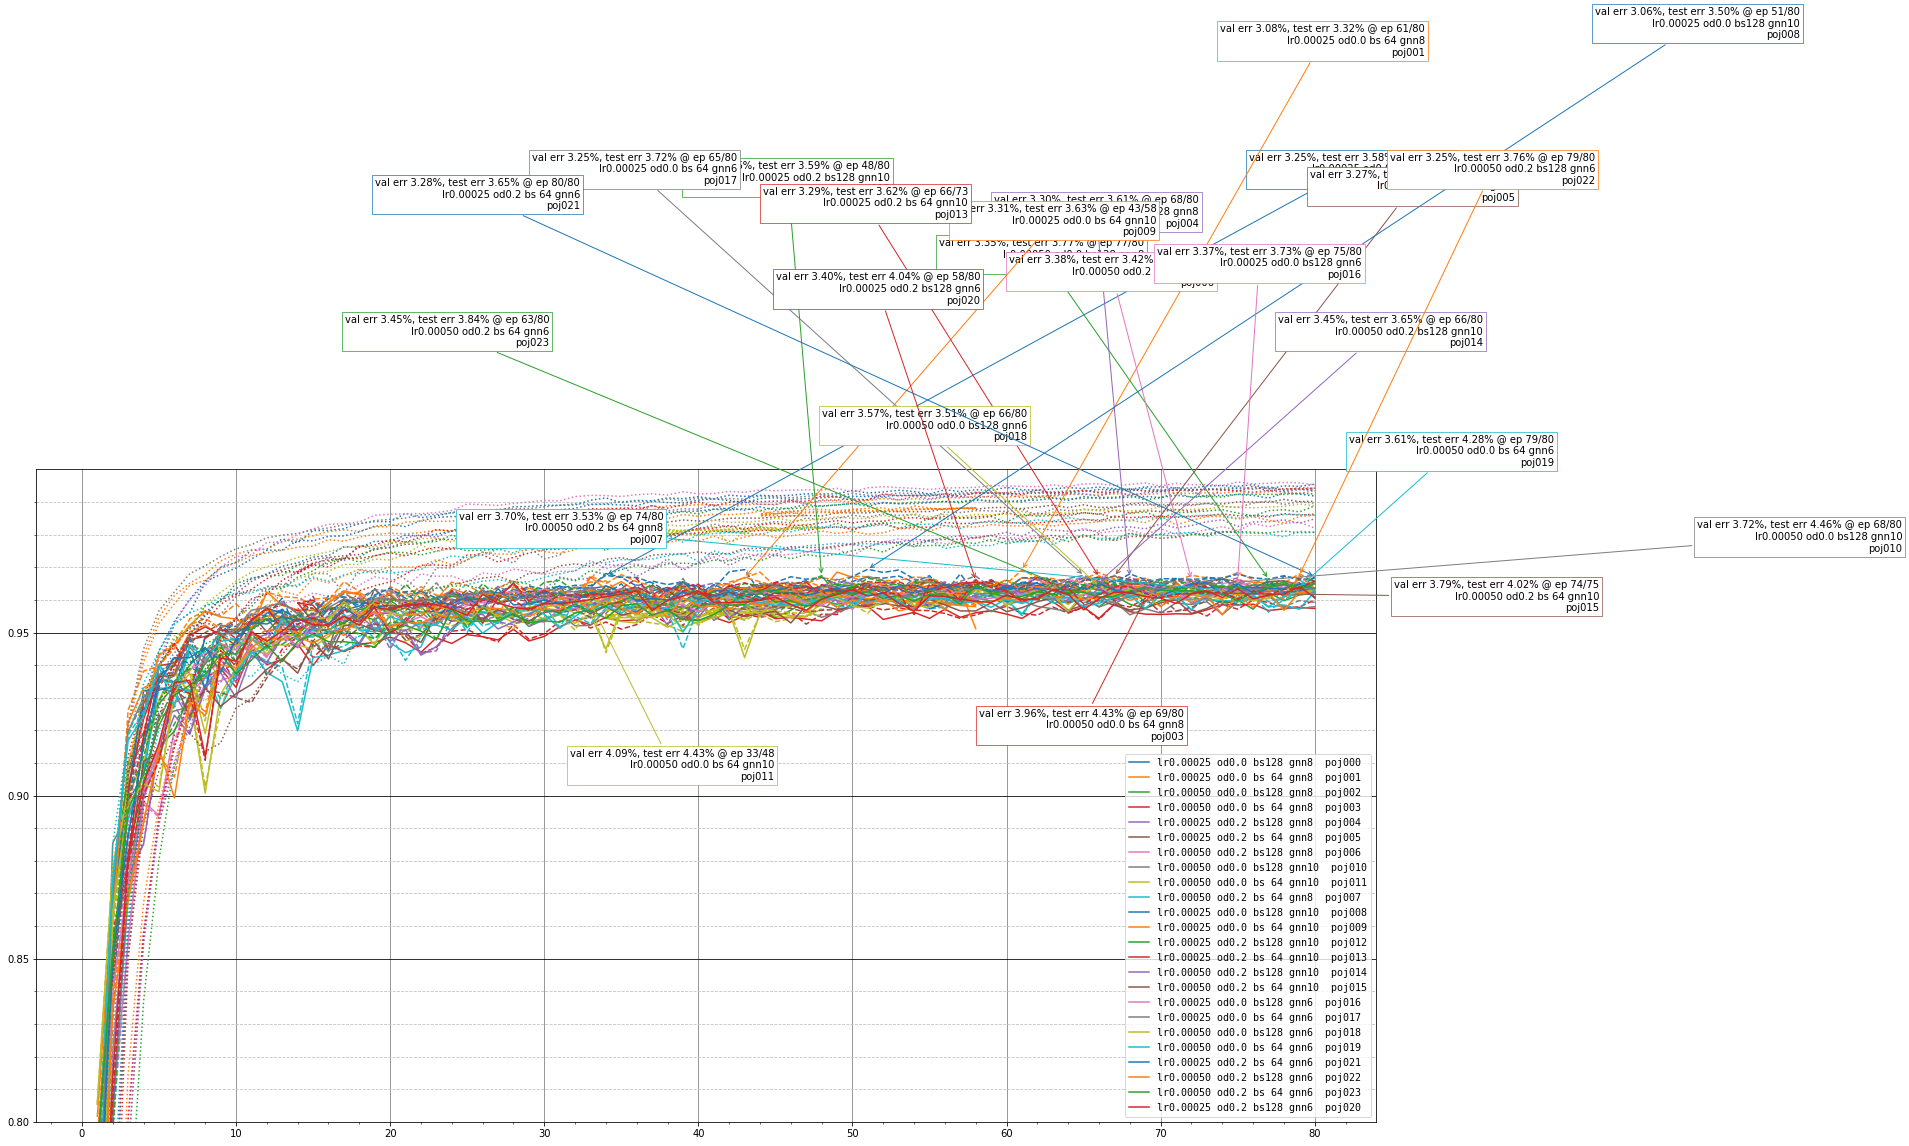

In [102]:
display_list = ['lr', 'output_dropout', 'batch_size', 'gnn_layers']

plot_logs(logs, hyps, lower_ylim=0.80, display_list=display_list, legend_loc='best')